# Case Study - Ambulance Revenue Analysis

## Problem Statement

A 450-bed hospital in Hyderabad has runs ambulance service using two business models – One is
Own Ambulances and other is by partnering with third party Ambulance Operators (here forth called
as Partners). It works on a 25% commission model with them.
The hospital is seeing a decline in Ambulance revenue despite no decrease in trips

The hospital has recruited you as a Data Analyst and has been given the task of answering the below
questions for them.

Q1. What is the reason for decline in Revenue?<br>
Q2. What steps do you take to improve this Revenue?<br>
Q3. If your recommendations are implemented, estimate the next 2 quarters Revenue and Trips?<br>
Q4. Propose metrics to that would help in improving revenue through Ambulances<br>

In [1]:
# IMPORTING LIBRARIES
import datetime
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\Viresh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Dataset

In [2]:
df=pd.read_csv('data_set_1.csv')
data=df
df.head(100)

case_id    trip_id   patient_id        created_on generated_by  \
0   BLRE210417-00192  1131257.0  CUST1207146  17-04-2021 14:10     Abhishek   
1   BLRE210430-00205  1135664.0  CUST1215994  30-04-2021 16:51       Nikhil   
2   BLRE210909-00069  1159203.0  CUST1259169  09-09-2021 14:19       Salman   
3   BLRE220119-00186  1183497.0  CUST1264299  19-01-2022 16:52      Sharukh   
4   BLRE220119-00187  1183498.0  CUST1264299  19-01-2022 16:56      Sharukh   
5   CHNE210119-00105  1114413.0  CUST1173082  19-01-2021 19:56        Kirti   
6   HYDE210101-00003  1111952.0  CUST1168124  01-01-2021 00:46       Farzan   
7   HYDE210101-00004  1111953.0  CUST1168122  01-01-2021 00:47     Birender   
8   HYDE210101-00011  1111960.0  CUST1168137  01-01-2021 03:39       Farzan   
9   HYDE210101-00017  1111966.0  CUST1168150  01-01-2021 05:24       Farzan   
10  HYDE210101-00036  1111985.0  CUST1168188  01-01-2021 10:43       Farzan   
11  HYDE210101-00039  1111988.0  CUST1168194  01-01-2021 11:46       Farzan   
12  HYDE210101-00056  1112005.0  CUST1168228  01-01-2021 13:42       Nikhil   
13  HYDE210101-00077  1112026.0  CUST1168271  01-01-2021 16:52        Aamir   
14  HYDE210101-00080  1112029.0  CUST1168277  01-01-2021 17:24       Yamini   
15  HYDE210101-00088  1112037.0  CUST1168293  01-01-2021 18:05      Shubham   
16  HYDE210101-00094  1112043.0  CUST1168305  01-01-2021 18:15      Shubham   
17  HYDE210101-00099  1112048.0  CUST1168315  01-01-2021 18:54      Shubham   
18  HYDE210101-00111  1112060.0  CUST1168339  01-01-2021 20:57      Shubham   
19  HYDE210101-00120  1112069.0  CUST1168358  01-01-2021 23:46      Shubham   
20  HYDE210102-00003  1112072.0  CUST1168363  02-01-2021 01:45      Shubham   
21  HYDE210102-00006  1112075.0  CUST1168369  02-01-2021 02:20     Birender   
22  HYDE210102-00008  1112077.0  CUST1168373  02-01-2021 03:09      Shubham   
23  HYDE210102-00012  1112081.0  CUST1168382  02-01-2021 05:39       Chawla   
24  HYDE210102-00024  1112093.0  CUST1168405  02-01-2021 07:58      Shubham   
25  HYDE210102-00031  1112100.0  CUST1168419  02-01-2021 09:51      Shubham   
26  HYDE210102-00034  1112103.0  CUST1168426  02-01-2021 10:03      Shubham   
27  HYDE210102-00041  1112110.0  CUST1168439  02-01-2021 10:42       Farzan   
28  HYDE210102-00053  1112123.0  CUST1168464  02-01-2021 12:14        Srinu   
29  HYDE210102-00055  1112125.0  CUST1168468  02-01-2021 12:33       Farzan   
30  HYDE210102-00056  1112126.0  CUST1168469  02-01-2021 12:45       Farzan   
31  HYDE210102-00060  1112130.0  CUST1168477  02-01-2021 13:18        Srinu   
32  HYDE210102-00080  1112150.0  CUST1168517  02-01-2021 15:29        Srinu   
33  HYDE210102-00093  1112163.0  CUST1168543  02-01-2021 17:05       Farzan   
34  HYDE210102-00105  1112175.0  CUST1168568  02-01-2021 17:55       Farzan   
35  HYDE210102-00110  1112180.0  CUST1168577  02-01-2021 18:31       Farzan   
36  HYDE210102-00111  1112181.0  CUST1168579  02-01-2021 18:37     Shantanu   
37  HYDE210102-00112  1112182.0  CUST1168581  02-01-2021 18:44       Farzan   
38  HYDE210102-00113  1112183.0  CUST1168584  02-01-2021 18:50       Farzan   
39  HYDE210102-00118  1112188.0  CUST1168594  02-01-2021 19:10       Farzan   
40  HYDE210102-00124  1112194.0  CUST1168607  02-01-2021 20:00       Farzan   
41  HYDE210102-00126  1112196.0  CUST1168610  02-01-2021 20:09       Farzan   
42  HYDE210102-00131  1112201.0  CUST1168620  02-01-2021 20:25       Farzan   
43  HYDE210102-00135  1112205.0  CUST1168629  02-01-2021 20:33       Farzan   
44  HYDE210102-00138  1112208.0  CUST1168635  02-01-2021 20:38       Farzan   
45  HYDE210102-00141  1112211.0  CUST1168640  02-01-2021 20:56       Farzan   
46  HYDE210103-00002  1112220.0  CUST1168658  03-01-2021 00:25      Shubham   
47  HYDE210103-00012  1112230.0  CUST1168680  03-01-2021 05:59      Shubham   
48  HYDE210103-00028  1112246.0  CUST1168713  03-01-2021 10:27        Kirti   
49  HYDE210103-00030  1112248.0  CUST1168717  03-01-2021 11:06 

In [3]:
df.shape

(5826, 38)

In [4]:
df.columns

Index(['case_id', 'trip_id', 'patient_id', 'created_on', 'generated_by',
       'agent_type', 'city', 'case_type', 'case_status', 'trip_status',
       'ambulance_status', 'medical_cause', 'emergency', 'bill_to_hospital',
       'source_name', 'ambulance_type_requested', 'ambulance_type_sent',
       'pickup_latitude', 'pickup_longitude', 'drop_latitude',
       'drop_longitude', 'standby_latitude', 'standby_longitude',
       'estimated_distance_to_pickup_kms', 'estimated_time_to_pickup_mins',
       'trip_distance_kms', 'system_fare', 'fare_proposed', 'trip_fare_agreed',
       'cost_to_owner', 'hospital_margin', 'ambulance_id',
       'ambulance_company_id', 'ambulance_ownership',
       'cancellation_amount_hospital', 'cancellation_amount_operator',
       'trip_type', 'service_type'],
      dtype='object')

## Data-Preprocessing and Cleaning

In [5]:
df=df.drop(['case_id', 'trip_id', 'patient_id','source_name'],1)

In [6]:
df=df[df.city=='HYD']
df=df.drop(['city'],1)

In [7]:
df.insert(loc=1,column='month',value=pd.to_datetime(df.created_on).dt.strftime('%m %Y'))
df.insert(loc=25,column='fare_sys_vs_prop',value=df.system_fare-df.fare_proposed)
df.insert(loc=26,column='fare_prop_vs_agreed',value=df.fare_proposed-df.trip_fare_agreed)
df.insert(loc=27,column='fare_sys_vs_agreed',value=df.system_fare-df.trip_fare_agreed)
df.insert(loc=28,column='change',value=df.fare_sys_vs_agreed/df.system_fare*100)
df.change.replace({np.nan:0},inplace=True) # Replacing null values due to division by Zeros
df.insert(loc=29,column='discount',value=df.change.map(lambda x: 0 if x<=0 else abs(x)))

In [8]:
def lab(x):
    if x in ['01 2021', '02 2021', '03 2021', '04 2021', '05 2021']:
        return 'Before'
    else:
        return 'After'

In [9]:
# Labeling pre/post June data
df['Label']=df.month.map(lambda a:lab(a))

In [10]:
pd.DataFrame({'count':df.isnull().sum(),
             'Percent':df.isnull().sum()/len(df)*100})

count    Percent
created_on                            0   0.000000
month                                 0   0.000000
generated_by                          0   0.000000
agent_type                            7   0.120358
case_type                             0   0.000000
case_status                           0   0.000000
trip_status                           5   0.085970
ambulance_status                    919  15.801238
medical_cause                         0   0.000000
emergency                             0   0.000000
bill_to_hospital                      0   0.000000
ambulance_type_requested              5   0.085970
ambulance_type_sent                   0   0.000000
pickup_latitude                       7   0.120358
pickup_longitude                      7   0.120358
drop_latitude                         7   0.120358
drop_longitude                        7   0.120358
standby_latitude                   5814  99.965612
standby_longitude                  5814  99.965612
estimated_distance_to_pickup_kms   1772  30.467675
estimated_time_to_pickup_mins      1772  30.467675
trip_distance_kms                     5   0.085970
system_fare                           0   0.000000
fare_proposed                         0   0.000000
trip_fare_agreed                      0   0.000000
fare_sys_vs_prop                      0   0.000000
fare_prop_vs_agreed                   0   0.000000
fare_sys_vs_agreed                    0   0.000000
change                                0   0.000000
discount                              0   0.000000
cost_to_owner                       919  15.801238
hospital_margin                     919  15.801238
ambulance_id                        919  15.801238
ambulance_company_id                919  15.801238
ambulance_ownership                 919  15.801238
cancellation_amount_hospital        919  15.801238
cancellation_amount_operator        919  15.801238
trip_type                             5   0.085970
service_type                       4503  77.424347
Label                                 0   0.000000

In [11]:
df=df.drop(['standby_latitude','standby_longitude','service_type'],1)

In [12]:
df=df[df.generated_by!='0']

In [13]:
df.ambulance_type_requested.replace({'Eeco':'EECO','OMNI':'Omni','TEMPO':'Tempo'},inplace=True)
df.agent_type.replace({'CC':'Call Center'},inplace=True)

In [14]:
df.ambulance_type_requested.unique()

array(['EECO', 'Tempo', 'Omni', 'ALS', 'Medtaxi', 'MUV', nan],
      dtype=object)

In [15]:
df=df[~(df.discount.isin([np.inf,-np.inf]))]

In [16]:
df1=df
df_22=df[pd.to_datetime(df.created_on).dt.year==2022]
df=df[pd.to_datetime(df.created_on).dt.year==2021]

In [17]:
df.generated_by.nunique()

69

In [18]:
78-11-12

55

#### Null Values

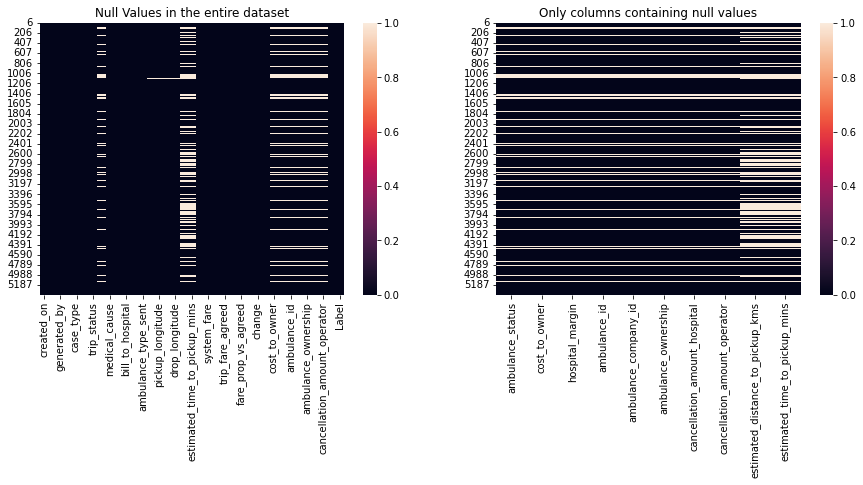

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Null Values in the entire dataset')
sns.heatmap(df.isnull())
plt.subplot(1,2,2)
plt.title('Only columns containing null values')
sns.heatmap(df[['ambulance_status','cost_to_owner', 'hospital_margin',
       'ambulance_id', 'ambulance_company_id', 'ambulance_ownership',
       'cancellation_amount_hospital', 'cancellation_amount_operator', 'estimated_distance_to_pickup_kms',
                'estimated_time_to_pickup_mins']].isnull())
plt.show()

In [20]:
df_null=df[df.estimated_distance_to_pickup_kms.isnull()]

In [21]:
df.trip_status.value_counts()/len(df)*100

COMPLETED     82.466928
CANCELLED     15.856158
CREATED        1.229737
INPROGRESS     0.447177
Name: trip_status, dtype: float64

In [22]:
df.Label.value_counts()/len(df)*100

After     52.245202
Before    47.754798
Name: Label, dtype: float64

In [23]:
df.agent_type.value_counts()/len(df)*100

Ground Operations    88.075275
Call Center          11.328489
HO                    0.596236
Name: agent_type, dtype: float64

In [24]:
df.ambulance_ownership.value_counts()/len(df)*100

Owned      54.015279
Partner    30.184461
Name: ambulance_ownership, dtype: float64

In [25]:
data.city.value_counts()/len(df)*100

HYD    108.365940
BLR      0.093162
MUM      0.037265
CHN      0.018632
IDR      0.018632
KOL      0.018632
Name: city, dtype: float64

## Variable Analysis

In [26]:
dfcat=df.select_dtypes(include=np.object)
dfnum=df.select_dtypes(include=np.number)
df_null_cat=df_null.select_dtypes(include=np.object)
df_null_num=df_null.select_dtypes(include=np.number)

### Univariate

GENERATED_BY


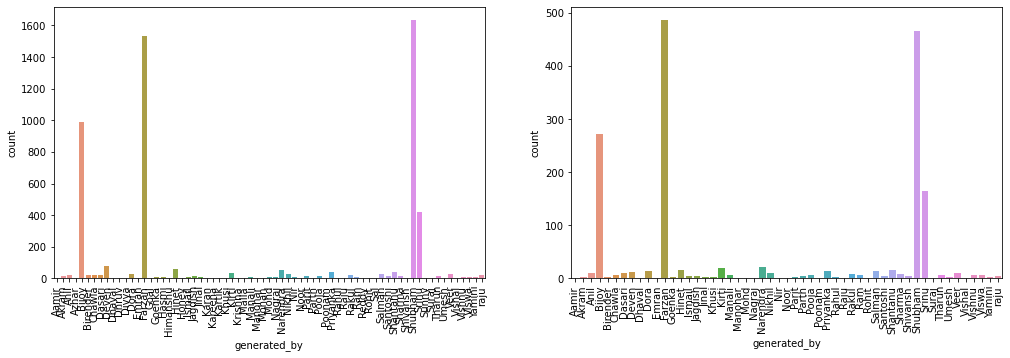

AGENT_TYPE


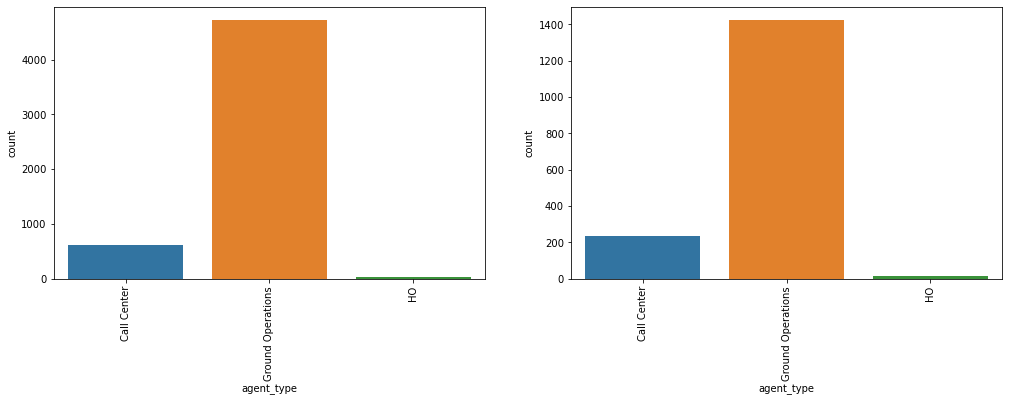

CASE_TYPE


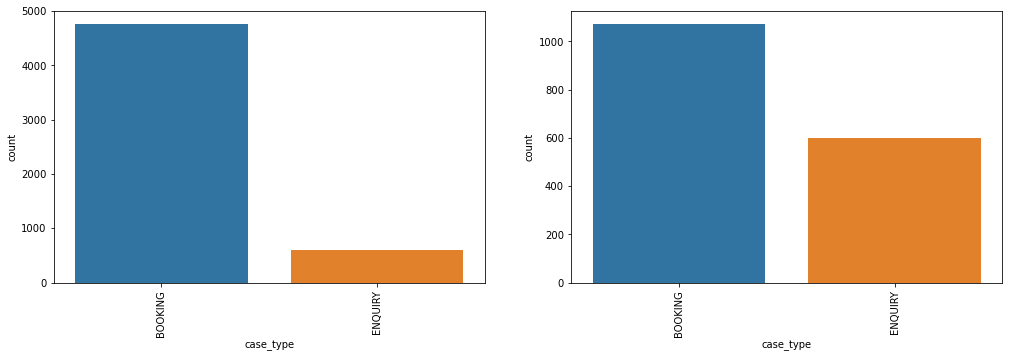

CASE_STATUS


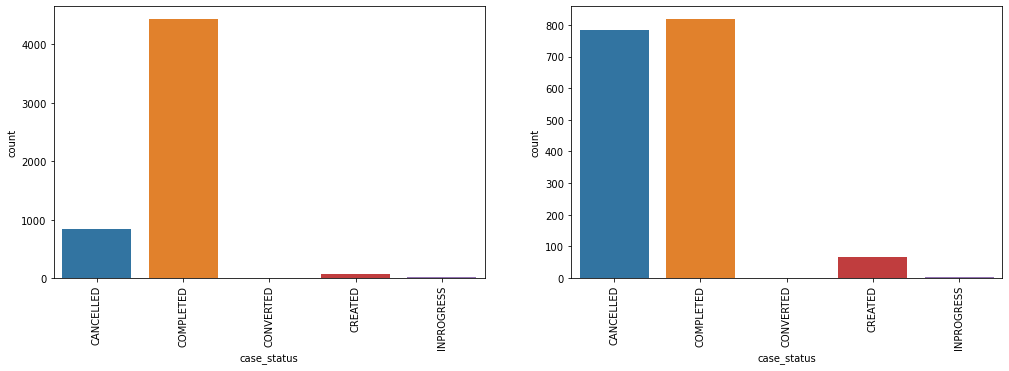

TRIP_STATUS


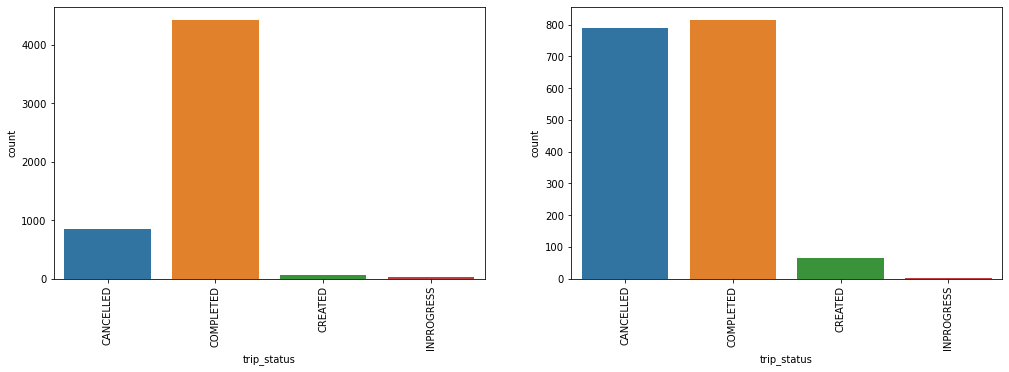

AMBULANCE_STATUS


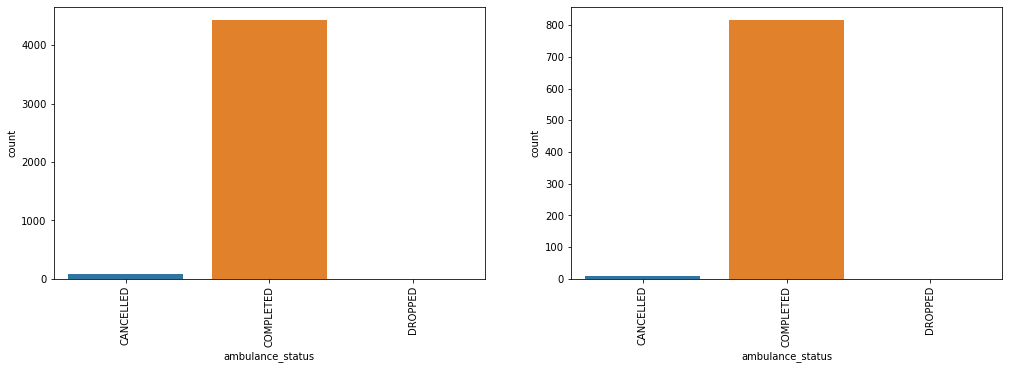

MEDICAL_CAUSE


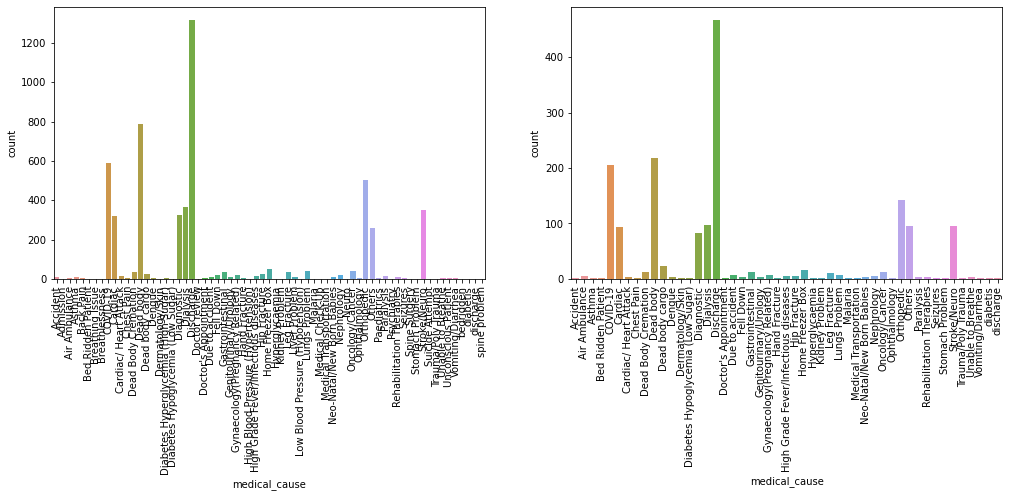

EMERGENCY


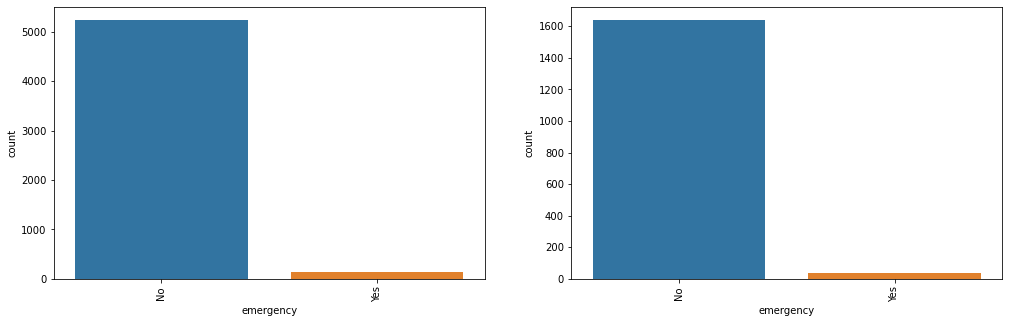

BILL_TO_HOSPITAL


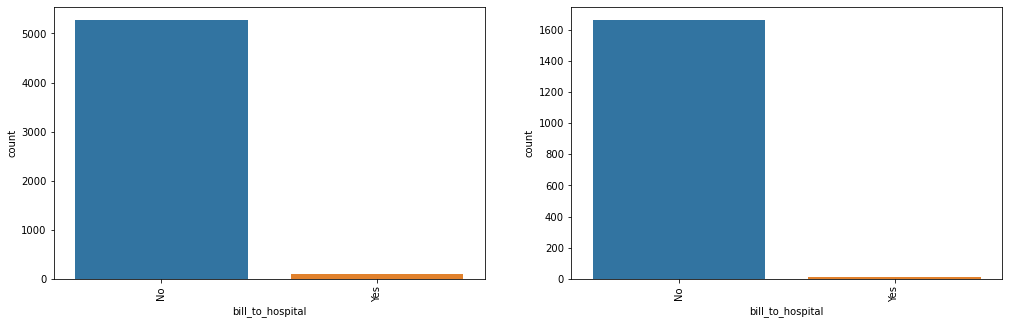

AMBULANCE_TYPE_REQUESTED


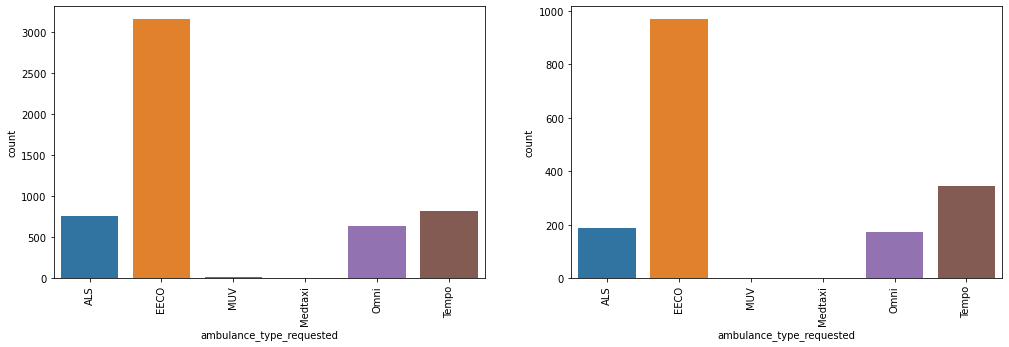

AMBULANCE_TYPE_SENT


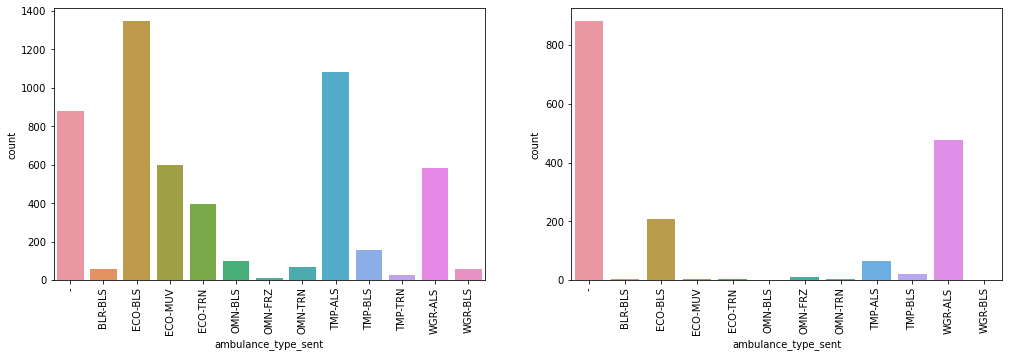

AMBULANCE_COMPANY_ID


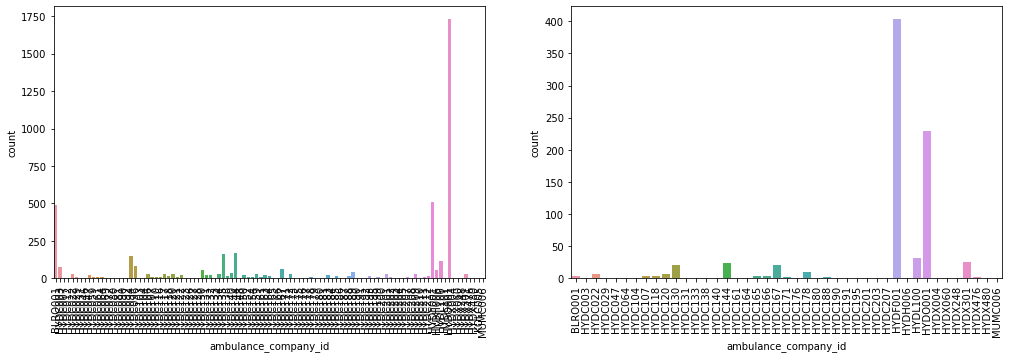

AMBULANCE_OWNERSHIP


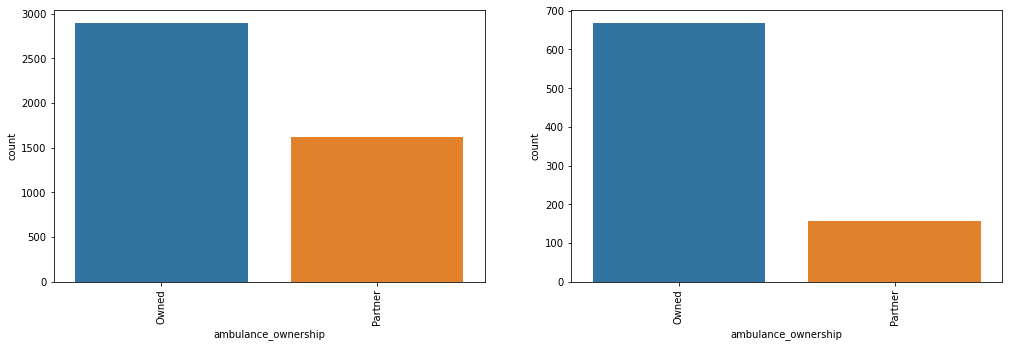

TRIP_TYPE


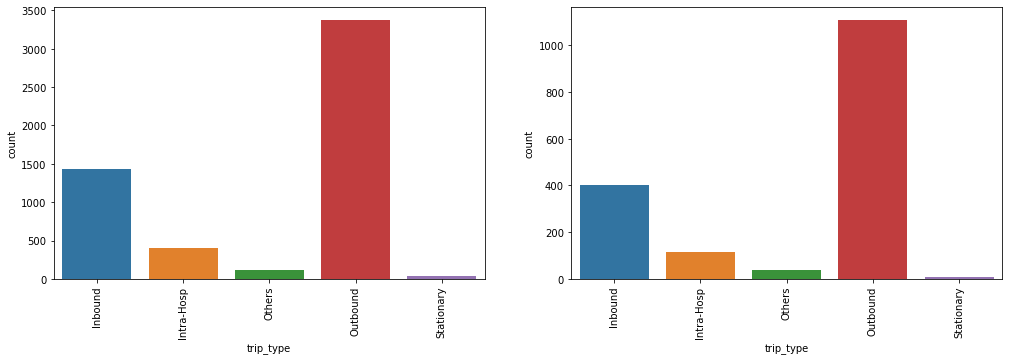

LABEL


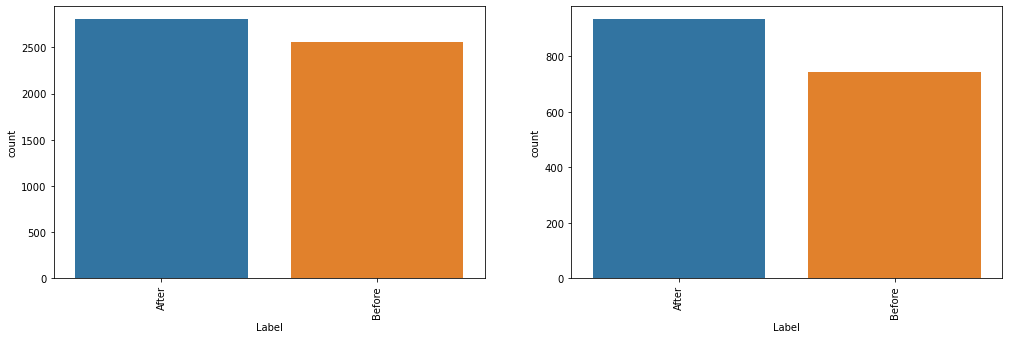

In [27]:
for i in dfcat.drop(['created_on','month','ambulance_id'],1).columns:
    print(i.upper())
    plt.figure(figsize=(17,5))
    plt.subplot(1,2,1)
    plt.xticks(rotation=90)
    sns.countplot(df[i],order=np.sort(df[i].dropna().unique()))
    plt.subplot(1,2,2)
    plt.xticks(rotation=90)
    sns.countplot(df_null[i],order=np.sort(df_null[i].dropna().unique()))
    plt.show()

PICKUP_LATITUDE


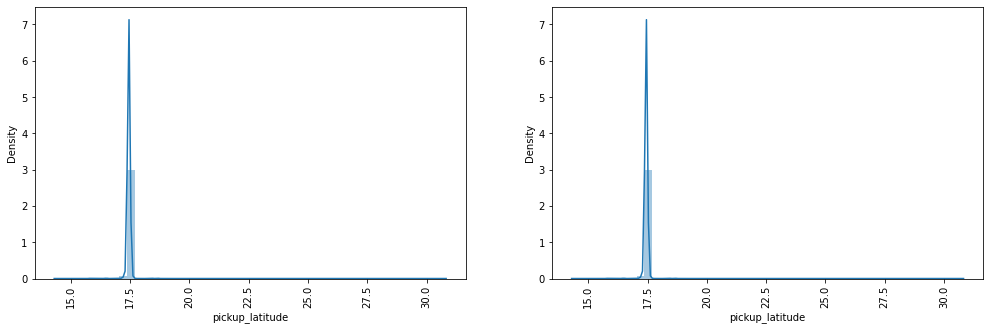



PICKUP_LONGITUDE


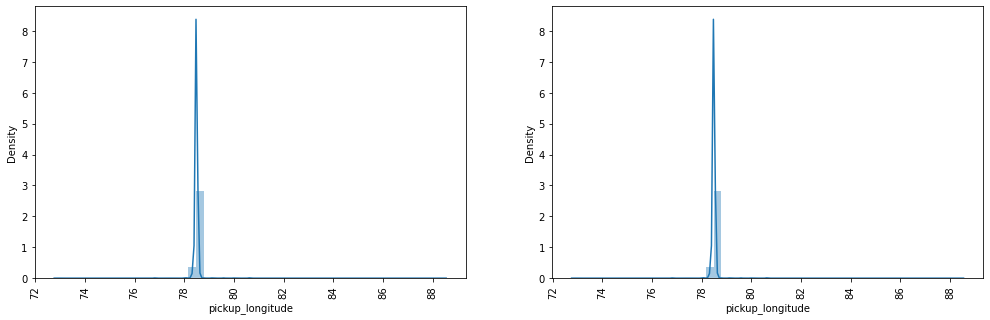



DROP_LATITUDE


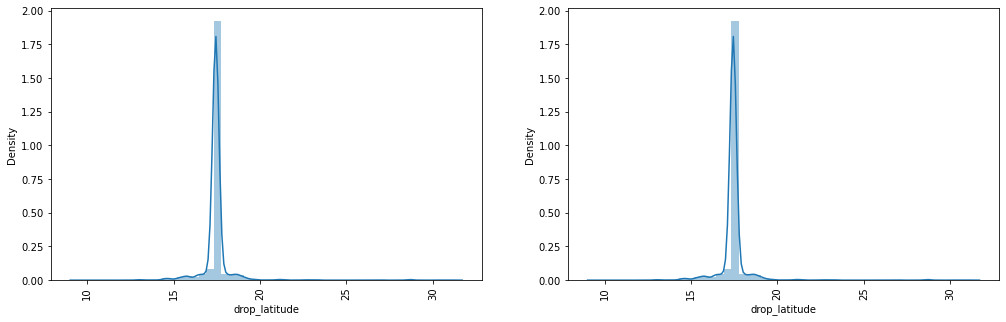



DROP_LONGITUDE


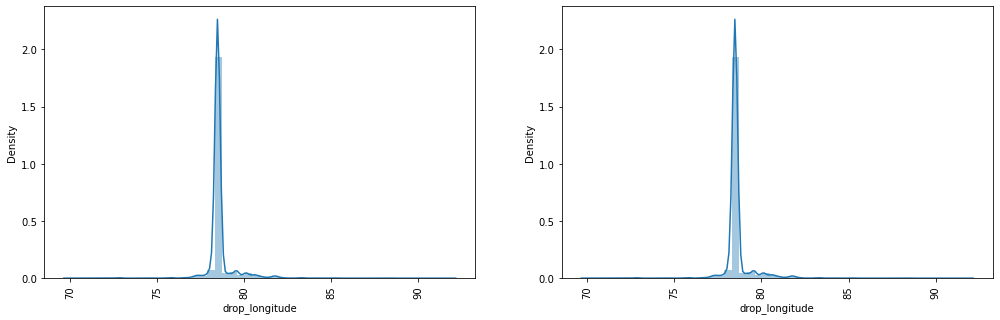



ESTIMATED_DISTANCE_TO_PICKUP_KMS


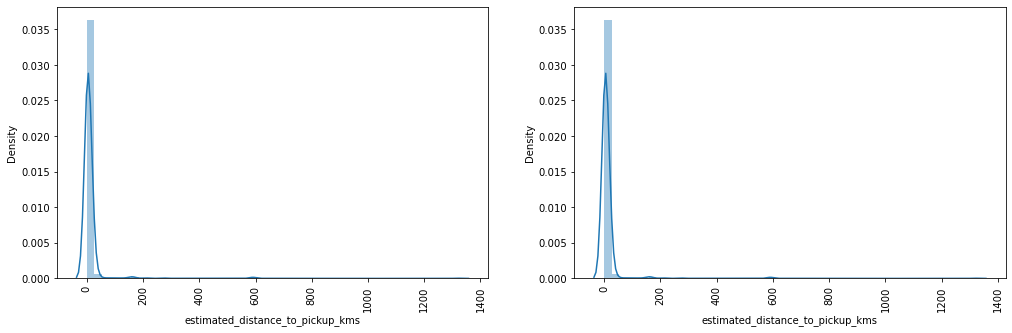



ESTIMATED_TIME_TO_PICKUP_MINS


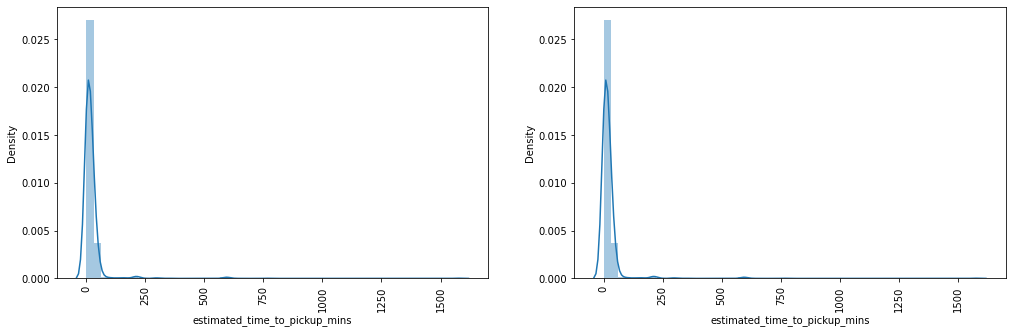



TRIP_DISTANCE_KMS


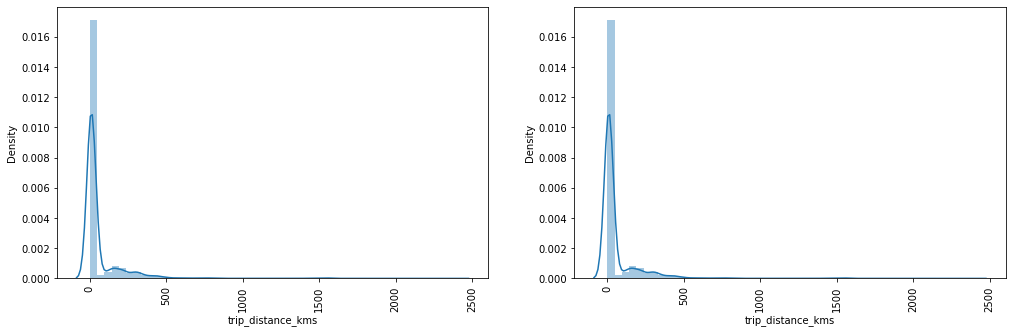



SYSTEM_FARE


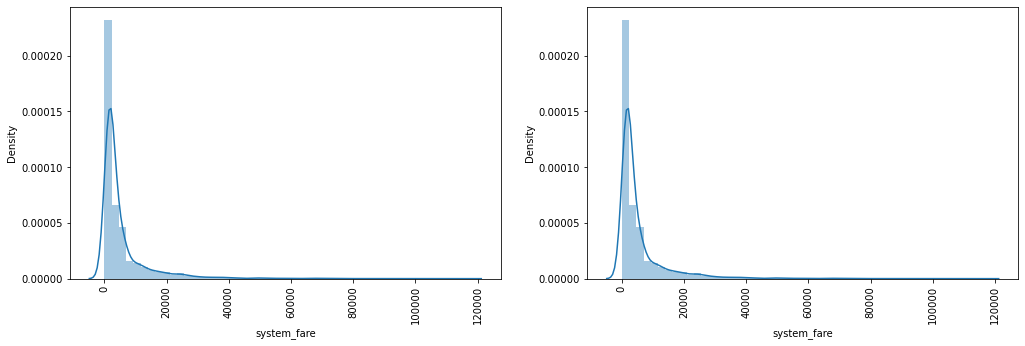



FARE_PROPOSED


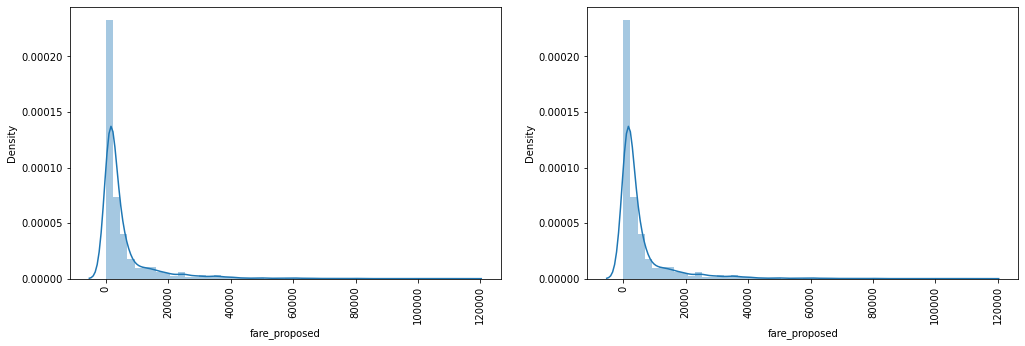



TRIP_FARE_AGREED


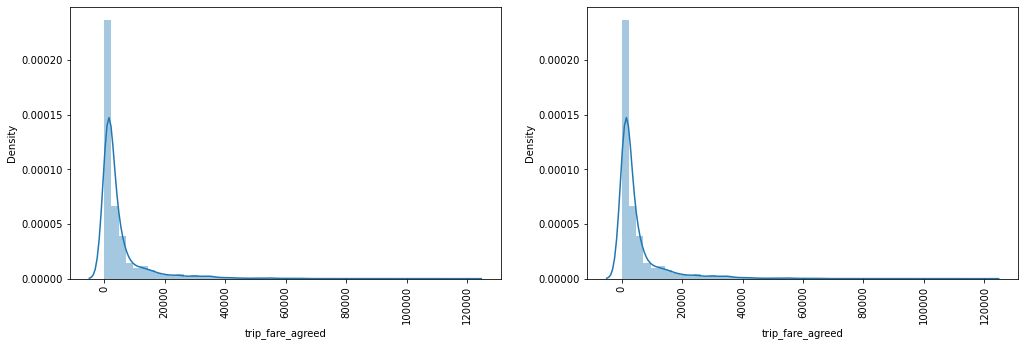



FARE_SYS_VS_PROP


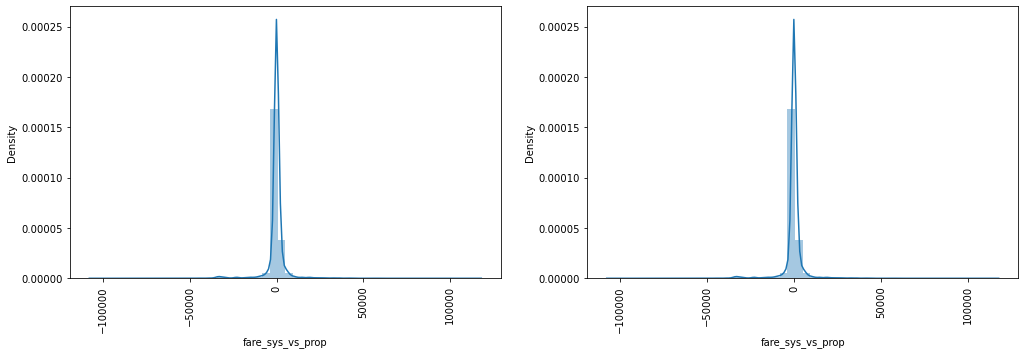



FARE_PROP_VS_AGREED


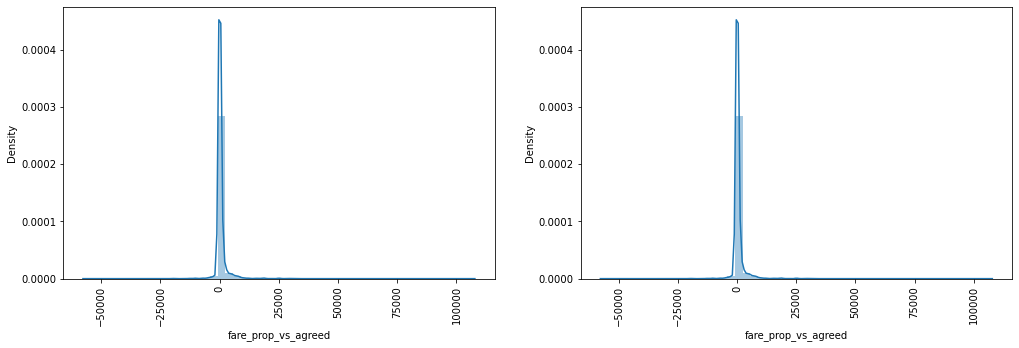



FARE_SYS_VS_AGREED


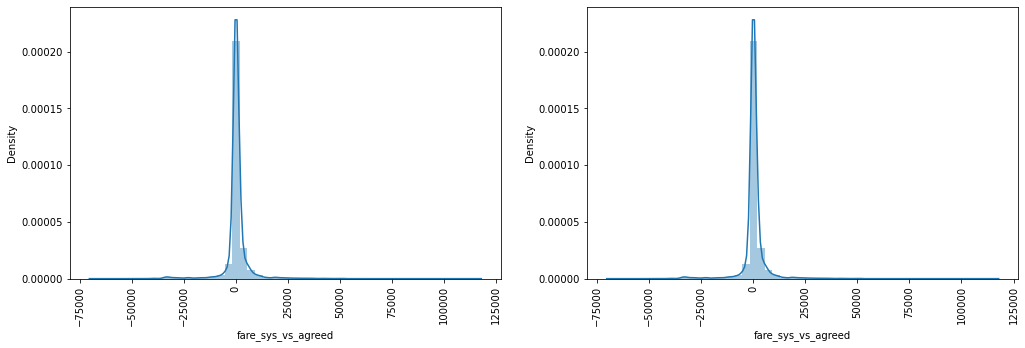



COST_TO_OWNER


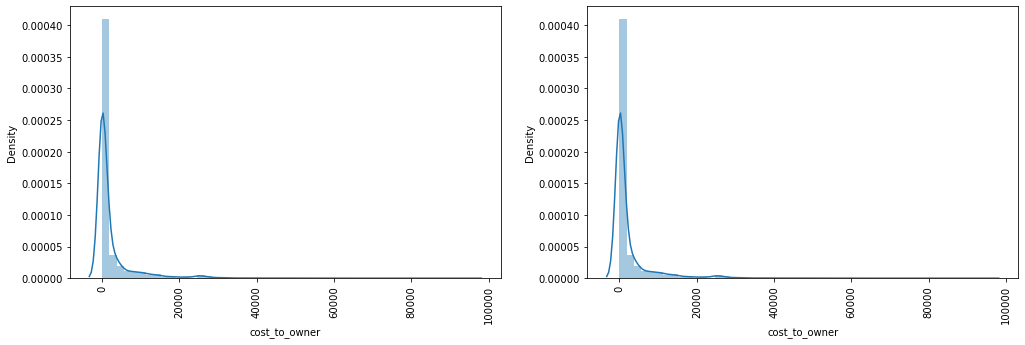



HOSPITAL_MARGIN


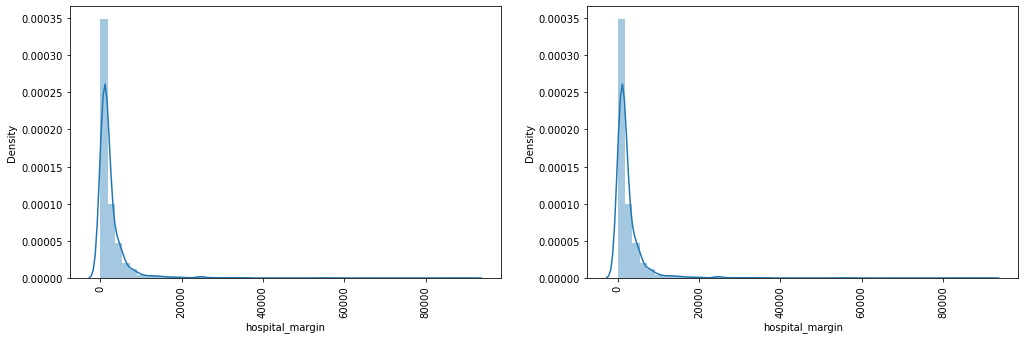



CANCELLATION_AMOUNT_HOSPITAL


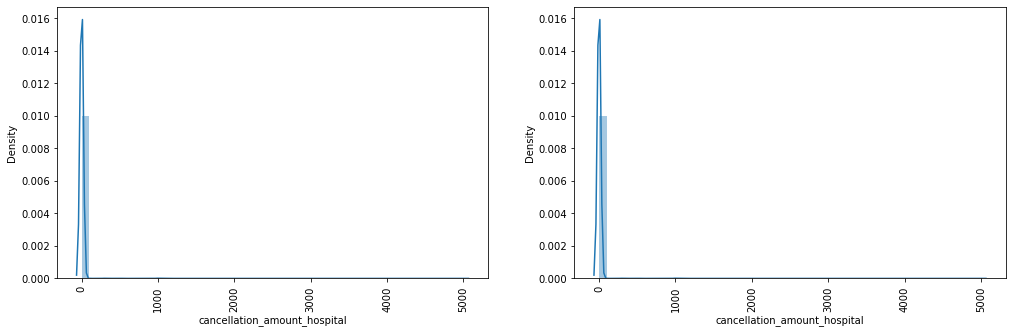



CANCELLATION_AMOUNT_OPERATOR


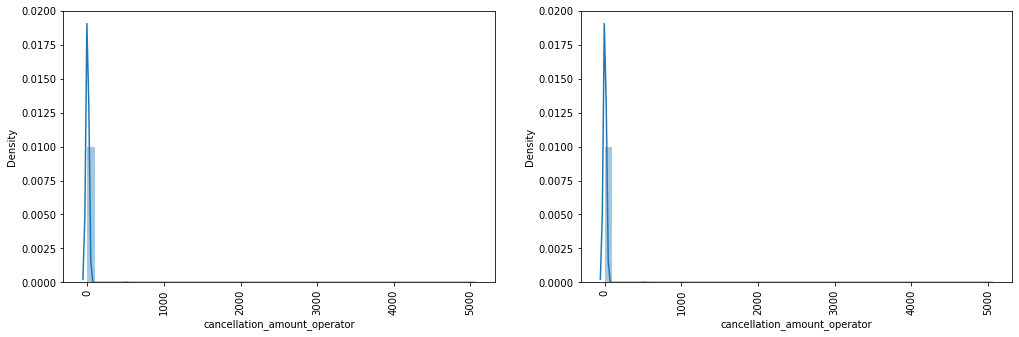

In [28]:
for i in dfnum.drop(['change','discount'],1).columns:
    print(i.upper())
    plt.figure(figsize=(17,5))
    
    plt.subplot(1,2,1)
    plt.xticks(rotation=90)
    sns.distplot(df[i])
    
    plt.subplot(1,2,2)
    plt.xticks(rotation=90)
    sns.distplot(df[i])

    plt.show()
    print()
    print()

### Month-wise Trends

In [29]:
df_mean=df[['month','estimated_distance_to_pickup_kms',
       'estimated_time_to_pickup_mins', 'trip_distance_kms', 'system_fare',
       'fare_proposed', 'trip_fare_agreed', 'fare_sys_vs_prop',
       'fare_prop_vs_agreed', 'fare_sys_vs_agreed', 'cost_to_owner',
       'hospital_margin', 'cancellation_amount_hospital',
       'cancellation_amount_operator']].groupby('month').mean()
df_mean

estimated_distance_to_pickup_kms  estimated_time_to_pickup_mins  \
month                                                                      
01 2021                          9.322581                      18.539589   
02 2021                          9.760446                      19.206128   
03 2021                          6.231552                      15.101781   
04 2021                         12.245146                      23.276699   
05 2021                         12.367089                      23.686709   
06 2021                         10.520362                      22.140271   
07 2021                         15.769231                      25.194332   
08 2021                         11.619048                      20.710317   
09 2021                         13.194690                      22.008850   
10 2021                         22.023490                      32.775168   
11 2021                         16.171521                      26.809061   
12 2021                         19.723270                      28.867925   

         trip_distance_kms  system_fare  fare_proposed  trip_fare_agreed  \
month                                                                      
01 2021          63.243825  5208.525164    5845.851204       5181.947484   
02 2021          64.672278  4847.714473    4786.497890       4443.440928   
03 2021          57.097489  4952.543659    4763.180077       4420.766284   
04 2021          49.406630  6085.419203    6850.254098       6374.934426   
05 2021          59.364018  6874.045356    9141.790000       8584.504000   
06 2021          71.129216  6271.714963    5947.371053       5604.376316   
07 2021          62.002801  5238.364057    5281.560724       4770.979328   
08 2021          83.478519  5965.477793    5573.514423       4955.425481   
09 2021          67.733467  5617.931572    5085.997543       4479.737101   
10 2021          61.705162  5244.821742    4912.795455       4712.126263   
11 2021          59.410316  5263.994015    4426.841849       3934.922141   
12 2021          62.288356  5668.806088    5734.594595       4993.859951   

         fare_sys_vs_prop  fare_prop_vs_agreed  fare_sys_vs_agreed  \
month                                                                
01 2021       -637.326039           663.903720           26.577681   
02 2021         61.216582           343.056962          404.273544   
03 2021        189.363582           342.413793          531.777375   
04 2021       -764.834895           475.319672         -289.515223   
05 2021      -2267.744644           557.286000        -1710.458644   
06 2021        324.343911           342.994737          667.338647   
07 2021        -43.196667           510.581395          467.384729   
08 2021        391.963370           618.088942         1010.052312   
09 2021        531.934029           606.260442         1138.194472   
10 2021        332.026288           200.669192          532.695480   
11 2021        837.152165           491.919708         1329.071873   
12 2021        -65.788506           740.734644          674.946138   

         cost_to_owner  hospital_margin  cancellation_amount_hospital  \
month                                                                   
01 2021    2420.663265      2775.892857                      2.551020   
02 2021    2031.184539      2412.680798                     13.216958   
03 2021    2226.735294      2056.417647                      0.000000   
04 2021    2990.352823      3058.437500                     16.129032   
05 2021    3266.566416      4053.859649                      1.253133   
06 2021    2222.523220      2875.188854                     10.835913   
07 2021    2148.129231      2459.021538                      3.076923   
08 2021    2143.065934      2455.714286                      0.000000   
09 2021    2155.983146      2417.471910                      1.179775   
10 2021    2271.276471      2029.017647                      0.000000   
11 2021    1689.855072

In [30]:
df_sum=df[['month','estimated_distance_to_pickup_kms',
       'estimated_time_to_pickup_mins', 'trip_distance_kms', 'system_fare',
       'fare_proposed', 'trip_fare_agreed', 'fare_sys_vs_prop',
       'fare_prop_vs_agreed', 'fare_sys_vs_agreed', 'cost_to_owner',
       'hospital_margin', 'cancellation_amount_hospital',
       'cancellation_amount_operator']].groupby('month').sum()

ESTIMATED_DISTANCE_TO_PICKUP_KMS


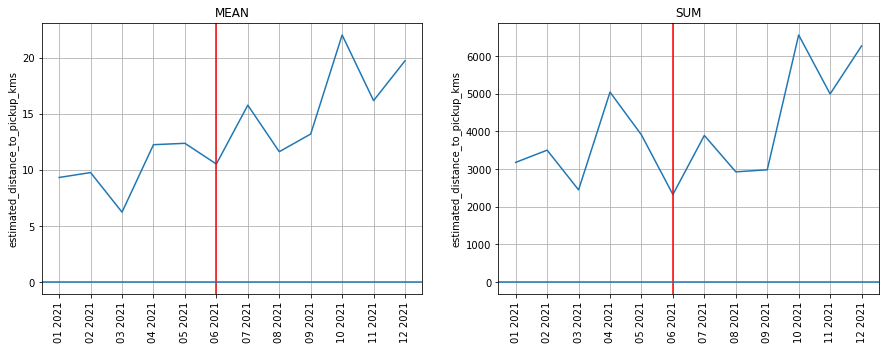



ESTIMATED_TIME_TO_PICKUP_MINS


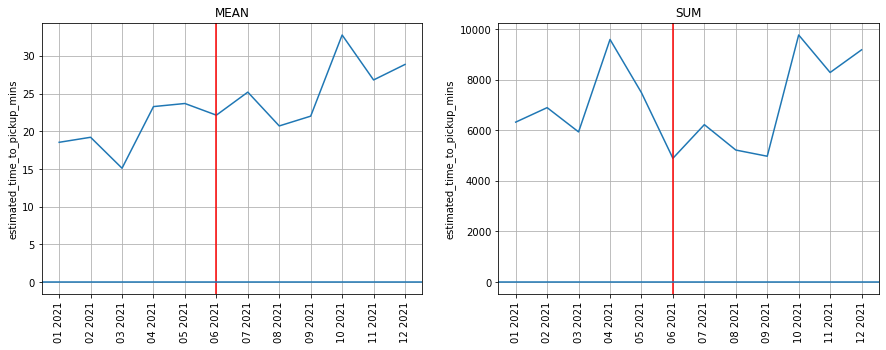



TRIP_DISTANCE_KMS


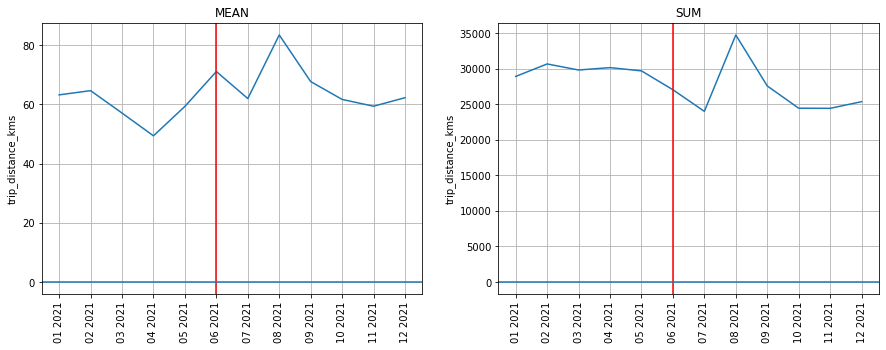



SYSTEM_FARE


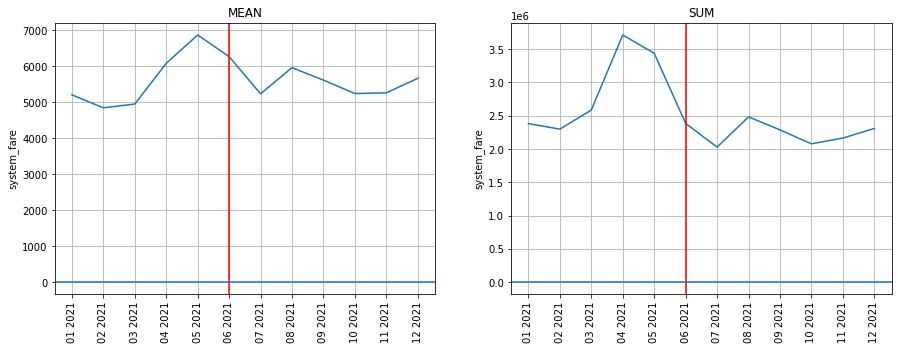



FARE_PROPOSED


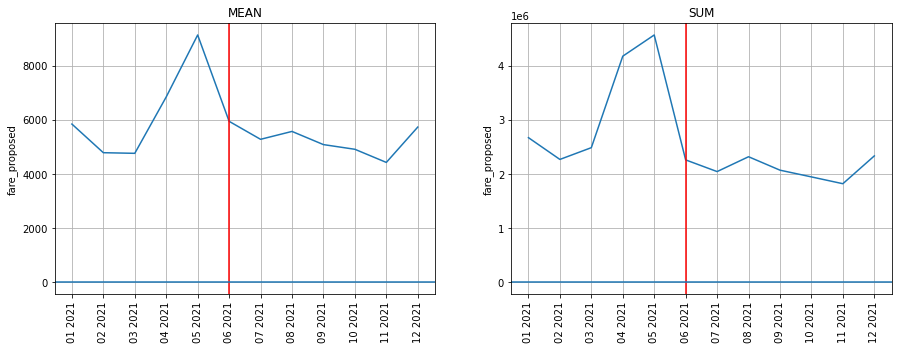



TRIP_FARE_AGREED


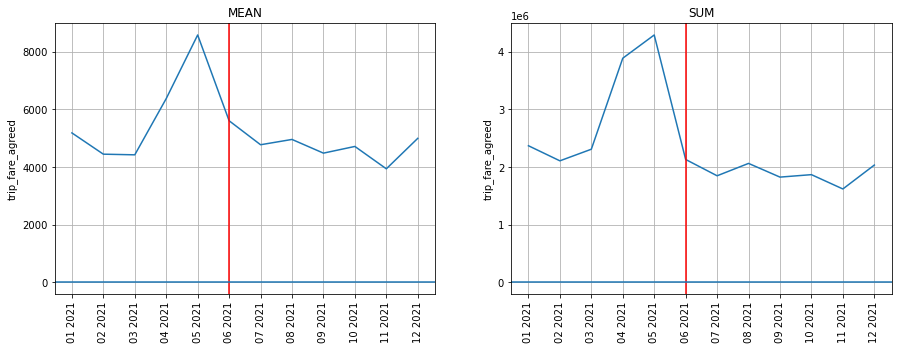



FARE_SYS_VS_PROP


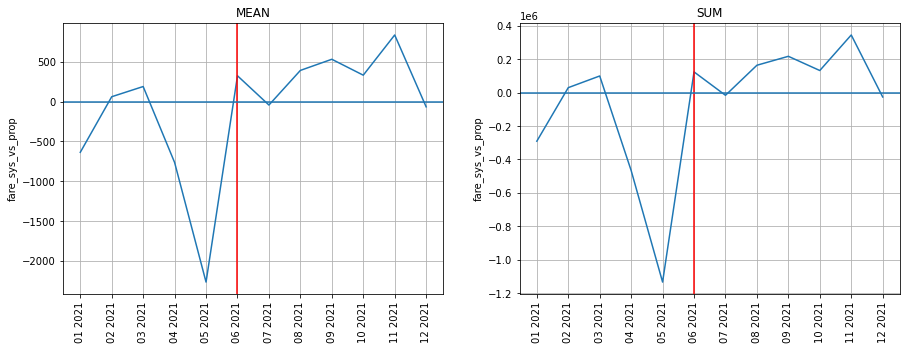



FARE_PROP_VS_AGREED


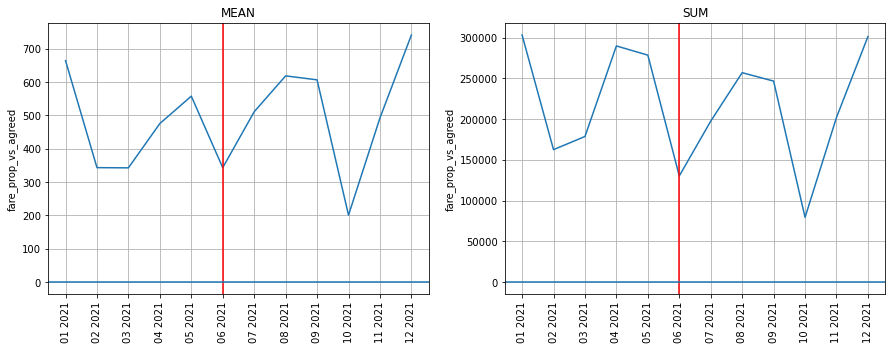



FARE_SYS_VS_AGREED


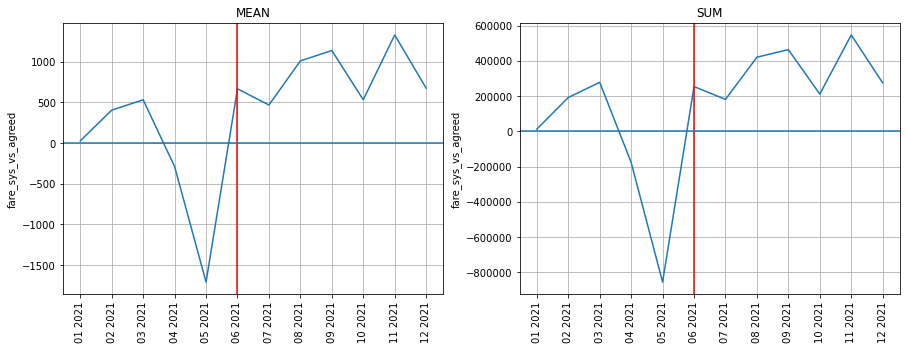



COST_TO_OWNER


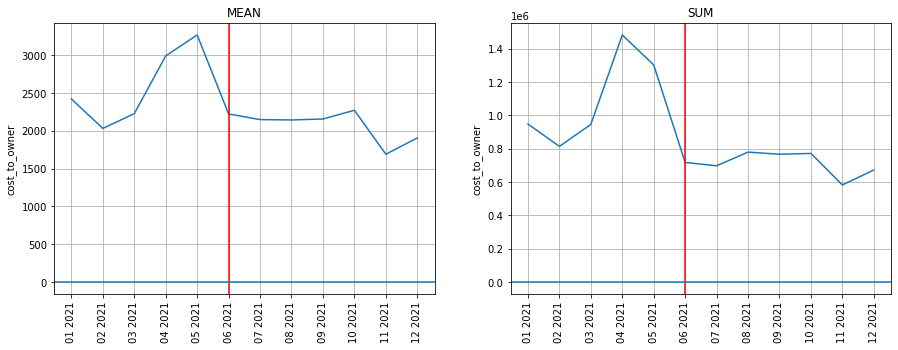



HOSPITAL_MARGIN


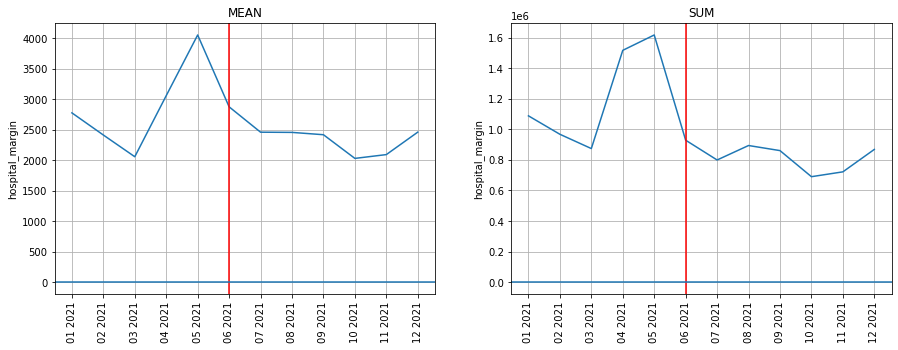



CANCELLATION_AMOUNT_HOSPITAL


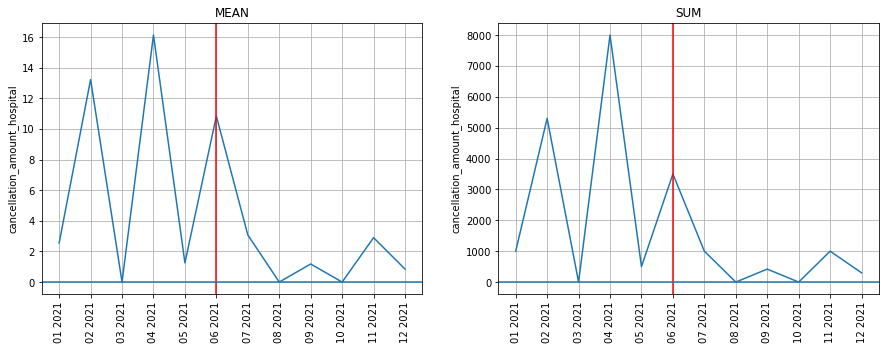



CANCELLATION_AMOUNT_OPERATOR


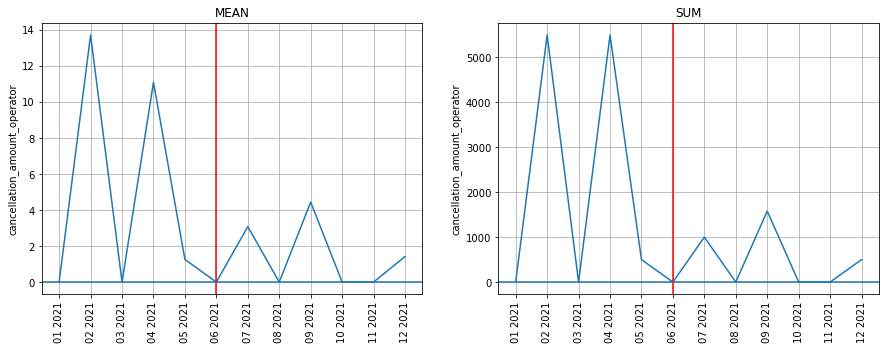

In [31]:
for i in df_mean.columns:
    print(i.upper())
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title('MEAN')
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.plot(df_mean[i])
    plt.axvline(x='06 2021',color='red')
    plt.axhline(y=0)
    plt.grid(visible=True, which='major', axis='both')
    
    plt.subplot(1,2,2)
    plt.title('SUM')
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.plot(df_sum[i])
    plt.axvline(x='06 2021',color='red')
    plt.axhline(y=0)
    plt.grid(visible=True, which='major', axis='both')
    plt.show()
    print()
    print()

#### Mean Estimated distance vs Actual Distance

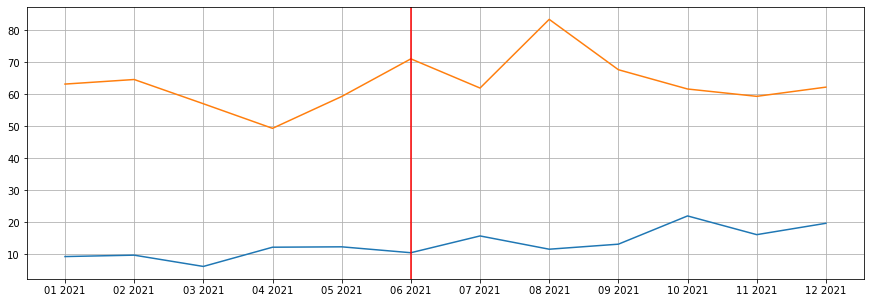

In [32]:
plt.figure(figsize=(15,5))
plt.plot(df_mean.estimated_distance_to_pickup_kms)
plt.plot(df_mean.trip_distance_kms)
plt.axvline(x='06 2021',color='red')
plt.grid(visible=True, which='major', axis='both')
plt.show()

ESTIMATED_DISTANCE_TO_PICKUP_KMS


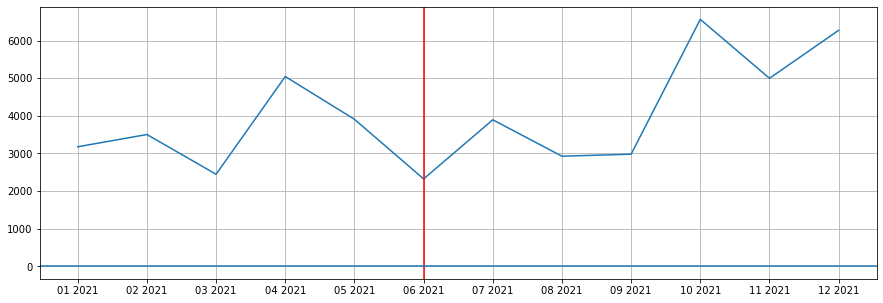



ESTIMATED_TIME_TO_PICKUP_MINS


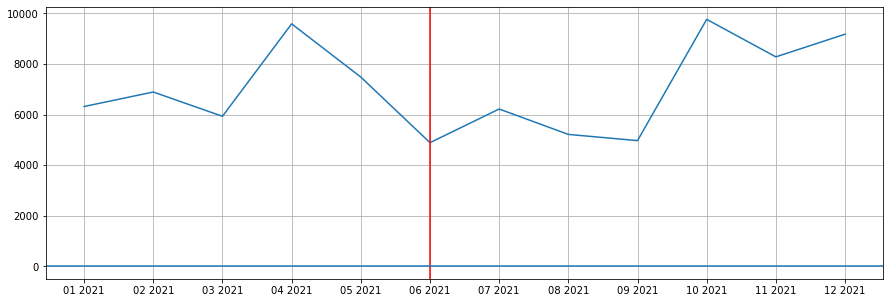



TRIP_DISTANCE_KMS


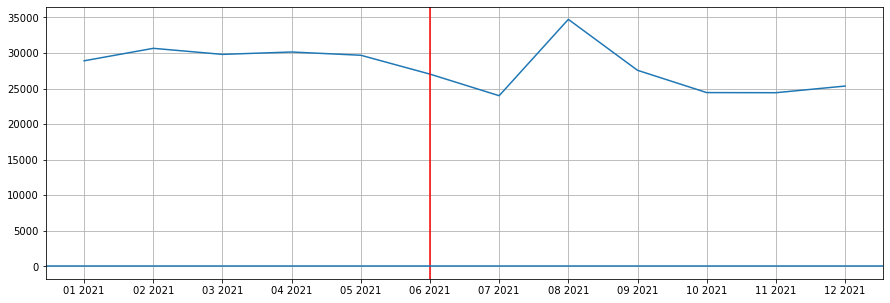



SYSTEM_FARE


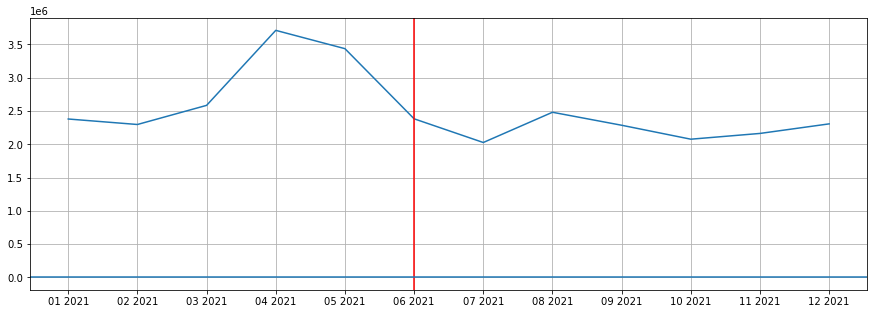



FARE_PROPOSED


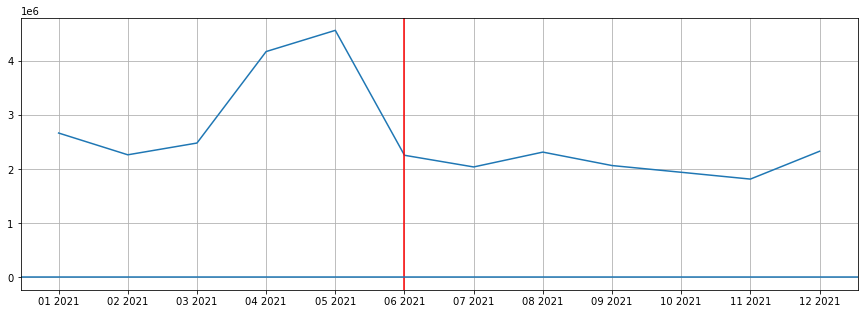



TRIP_FARE_AGREED


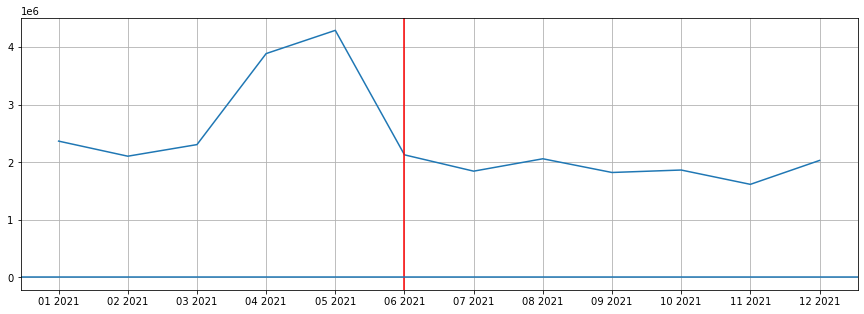



FARE_SYS_VS_PROP


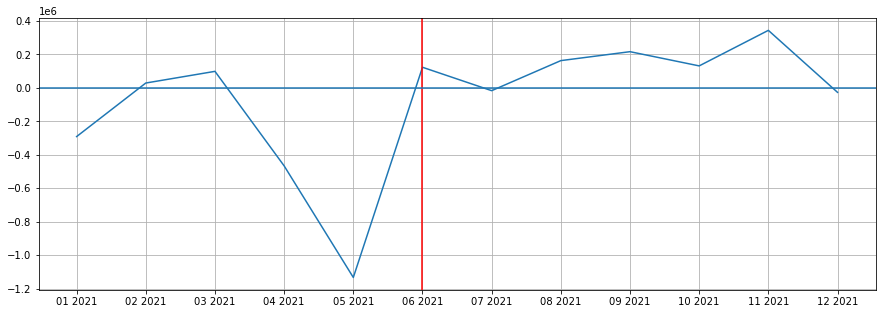



FARE_PROP_VS_AGREED


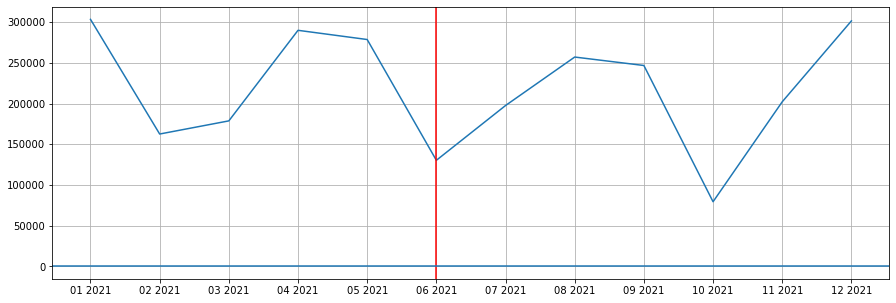



FARE_SYS_VS_AGREED


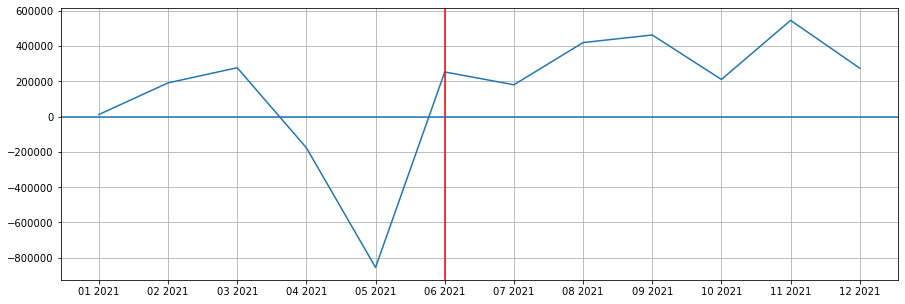



COST_TO_OWNER


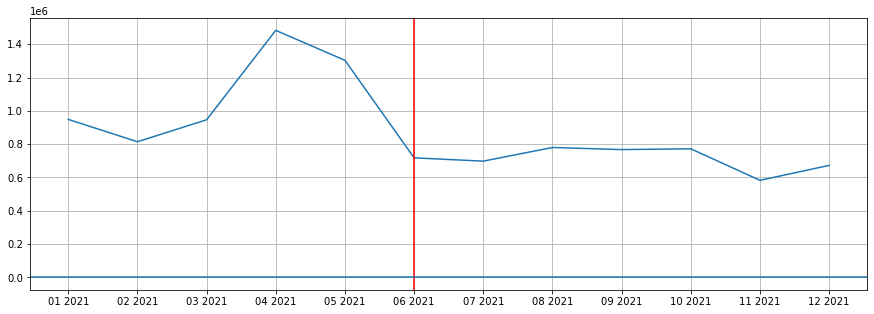



HOSPITAL_MARGIN


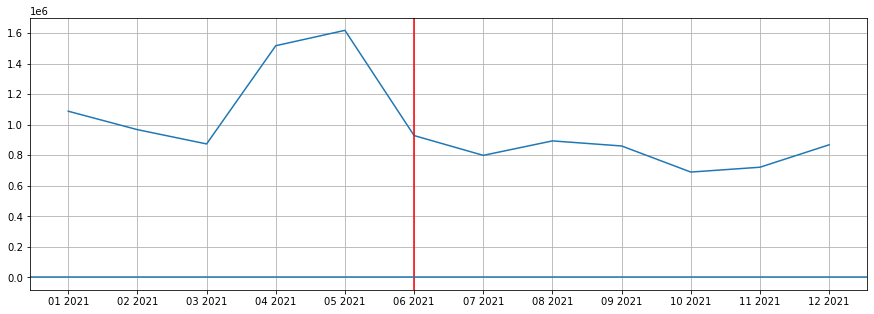



CANCELLATION_AMOUNT_HOSPITAL


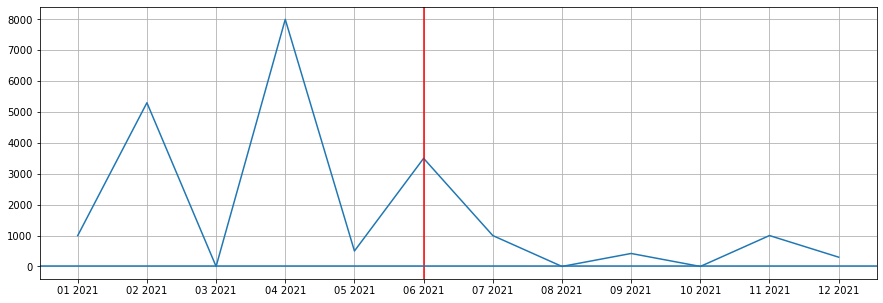



CANCELLATION_AMOUNT_OPERATOR


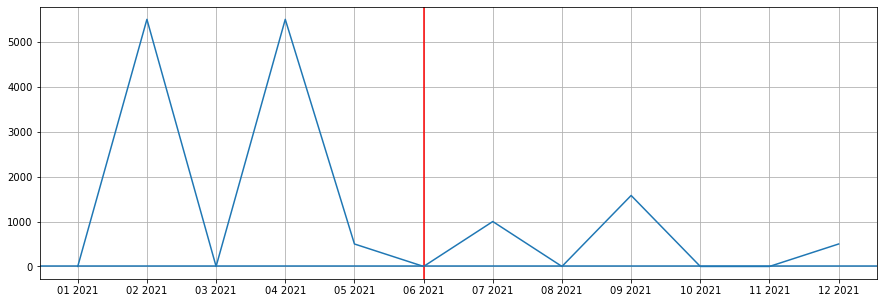

In [33]:
for i in df_sum.columns:
    print(i.upper())
    plt.figure(figsize=(15,5))
    plt.plot(df_sum[i])
    plt.axvline(x='06 2021',color='red')
    plt.axhline(y=0)
    plt.grid(visible=True, which='major', axis='both')
    plt.show()
    print()
    print()

In [34]:
monthly_trip_status=pd.crosstab(df.month,df.trip_status)
monthly_trip_status 

trip_status  CANCELLED  COMPLETED  CREATED  INPROGRESS
month                                                 
01 2021             62        388        7           0
02 2021             58        391       20           5
03 2021             99        420        1           2
04 2021            123        486        0           1
05 2021            108        388        1           3
06 2021             57        318        4           1
07 2021             66        318        2           1
08 2021             56        355        1           4
09 2021             51        351        4           1
10 2021             63        330        1           2
11 2021             62        341        7           1
12 2021             46        340       18           3

#### Cancelled vs Completed trips

CANCELLED


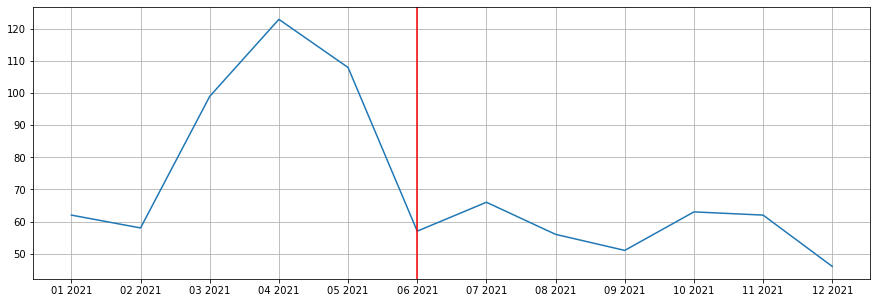



COMPLETED


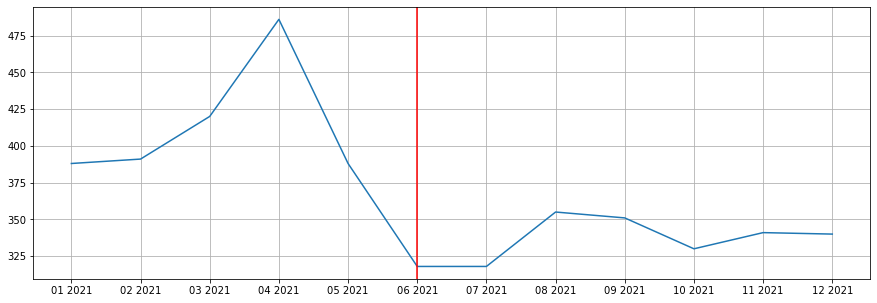

In [35]:
for i in ['CANCELLED','COMPLETED']:
    print(i.upper())
    plt.figure(figsize=(15,5))
    plt.plot(monthly_trip_status[i])
    plt.axvline(x='06 2021',color='red')
    plt.grid(visible=True, which='major', axis='both')
    plt.show()
    print()
    print()

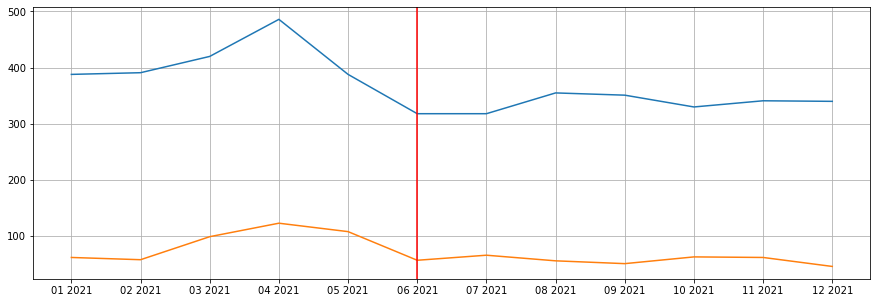

In [36]:
plt.figure(figsize=(15,5))
plt.plot(monthly_trip_status.COMPLETED)
plt.plot(monthly_trip_status.CANCELLED)
plt.axvline(x='06 2021',color='red')
plt.grid(visible=True, which='major', axis='both')
plt.show()

### Before June vs After June analysis

In [74]:
before=df[(df.month=='01 2021')| (df.month=='02 2021')| (df.month=='03 2021')| (df.month=='04 2021')| (df.month=='05 2021')]
before.head(1)

created_on    month generated_by         agent_type case_type  \
6  01-01-2021 00:46  01 2021       Farzan  Ground Operations   BOOKING   

  case_status trip_status ambulance_status medical_cause emergency  \
6   COMPLETED   COMPLETED        COMPLETED  Stroke/Neuro        No   

  bill_to_hospital ambulance_type_requested ambulance_type_sent  \
6               No                     EECO             BLR-BLS   

   pickup_latitude  pickup_longitude  drop_latitude  drop_longitude  \
6         17.43745          78.48229      17.247253       80.151445   

   estimated_distance_to_pickup_kms  estimated_time_to_pickup_mins  \
6                              12.0                           27.0   

   trip_distance_kms  system_fare  fare_proposed  trip_fare_agreed  \
6            203.434      9127.08           8000              8000   

   fare_sys_vs_prop  fare_prop_vs_agreed  fare_sys_vs_agreed     change  \
6           1127.08                    0             1127.08  12.348747   

    discount  cost_to_owner  hospital_margin ambulance_id  \
6  12.348747         6000.0           2000.0  HYDC144A001   

  ambulance_company_id ambulance_ownership  cancellation_amount_hospital  \
6              HYDC144             Partner                           0.0   

   cancellation_amount_operator trip_type   Label  
6                           0.0  Outbound  Before

In [75]:
after=df[~((df.month=='01 2021')| (df.month=='02 2021')| (df.month=='03 2021')| (df.month=='04 2021')| (df.month=='05 2021'))]
after.head(1)

created_on    month generated_by         agent_type case_type  \
99  06-01-2021 02:29  06 2021        Bijoy  Ground Operations   BOOKING   

   case_status trip_status ambulance_status medical_cause emergency  \
99   COMPLETED   COMPLETED        COMPLETED    Diagnostic        No   

   bill_to_hospital ambulance_type_requested ambulance_type_sent  \
99               No                     EECO             ECO-MUV   

    pickup_latitude  pickup_longitude  drop_latitude  drop_longitude  \
99        17.406623         78.543774       17.43745        78.48229   

    estimated_distance_to_pickup_kms  estimated_time_to_pickup_mins  \
99                              11.0                           25.0   

    trip_distance_kms  system_fare  fare_proposed  trip_fare_agreed  \
99              10.28       1575.0           1500              1500   

    fare_sys_vs_prop  fare_prop_vs_agreed  fare_sys_vs_agreed    change  \
99              75.0                    0                75.0  4.761905   

    discount  cost_to_owner  hospital_margin ambulance_id  \
99  4.761905            0.0           1500.0  HYDO001A001   

   ambulance_company_id ambulance_ownership  cancellation_amount_hospital  \
99              HYDO001               Owned                           0.0   

    cancellation_amount_operator trip_type  Label  
99                           0.0   Inbound  After

In [39]:
before_cat=before.select_dtypes(include=np.object)
before_num=before.select_dtypes(include=np.number)
after_cat=after.select_dtypes(include=np.object)
after_num=after.select_dtypes(include=np.number)

GENERATED_BY


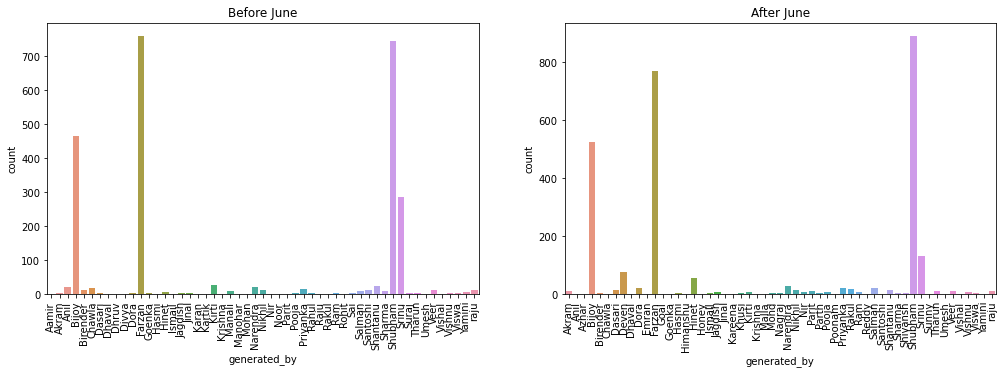

AGENT_TYPE


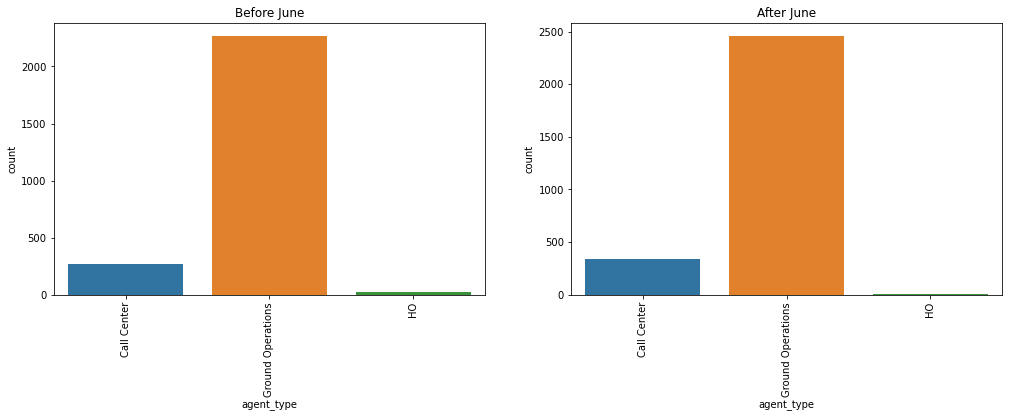

CASE_TYPE


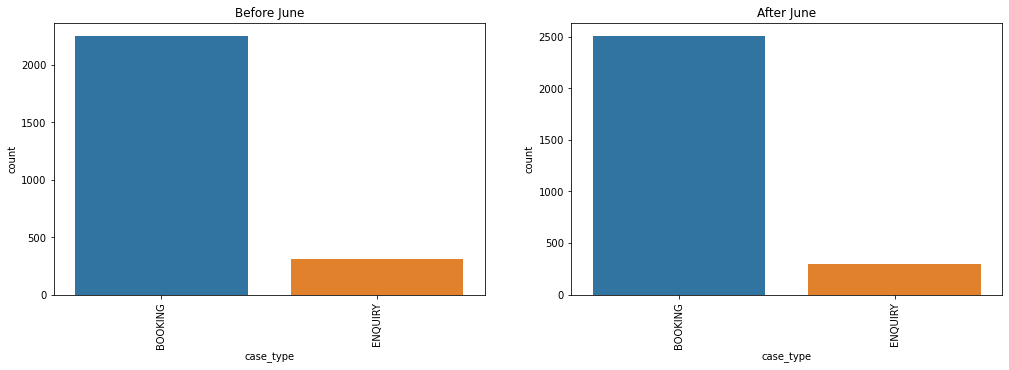

CASE_STATUS


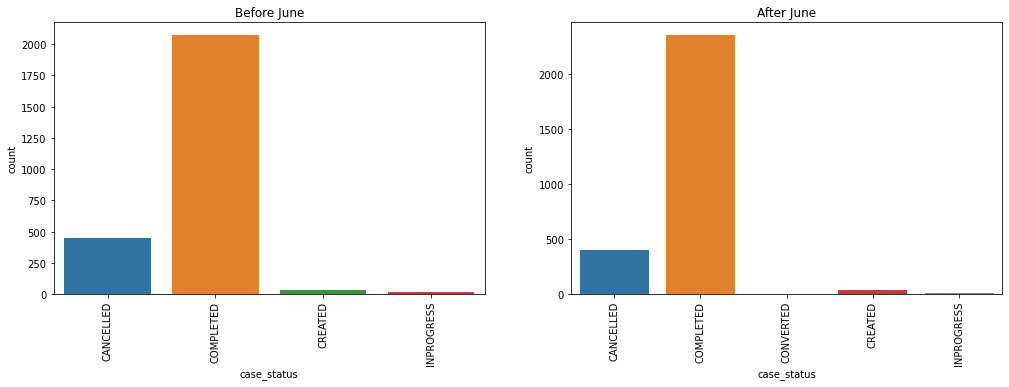

TRIP_STATUS


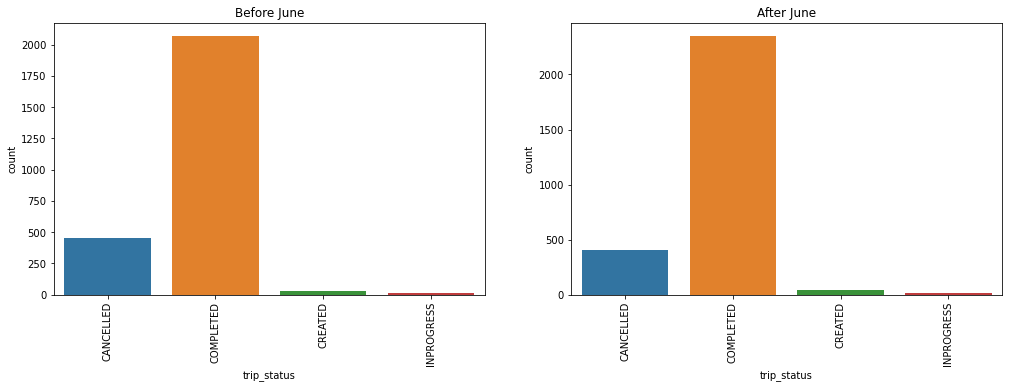

AMBULANCE_STATUS


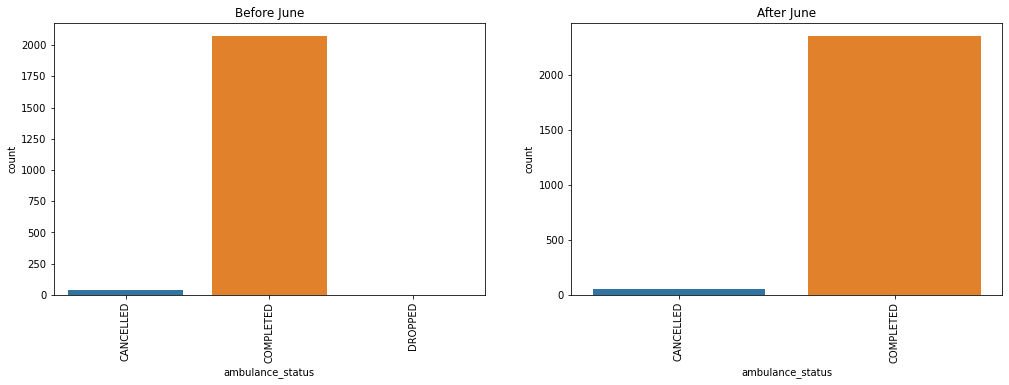

MEDICAL_CAUSE


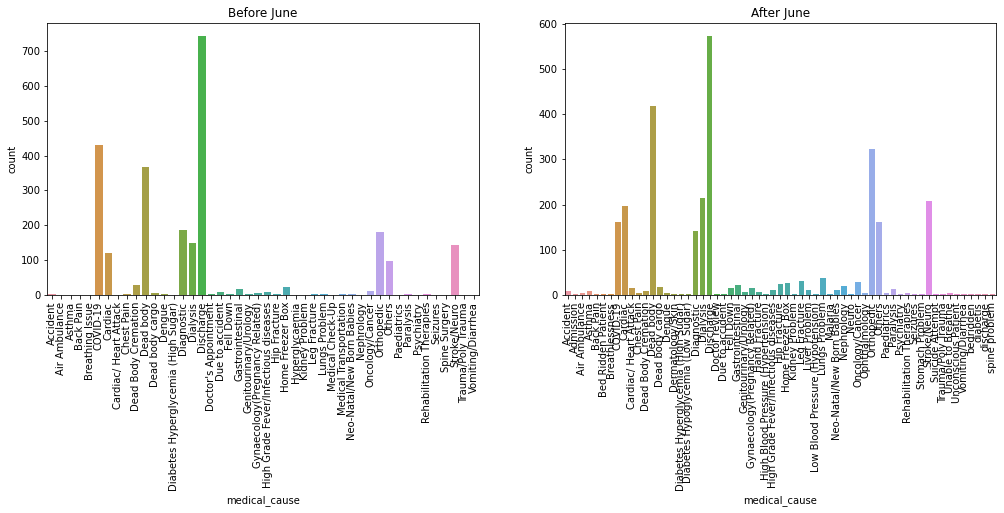

EMERGENCY


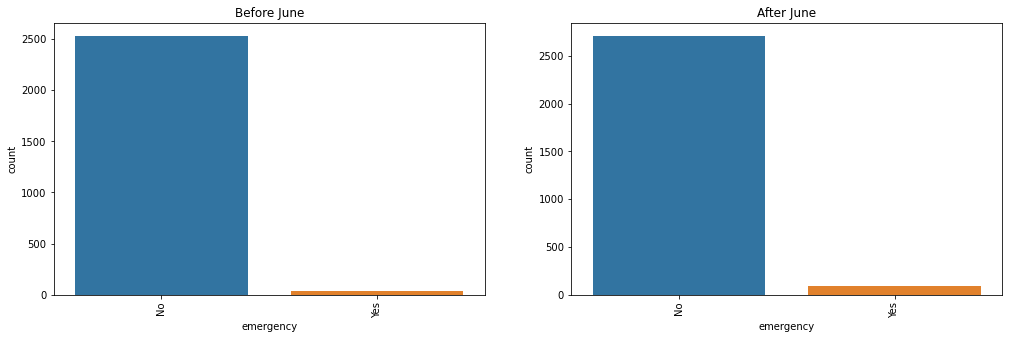

BILL_TO_HOSPITAL


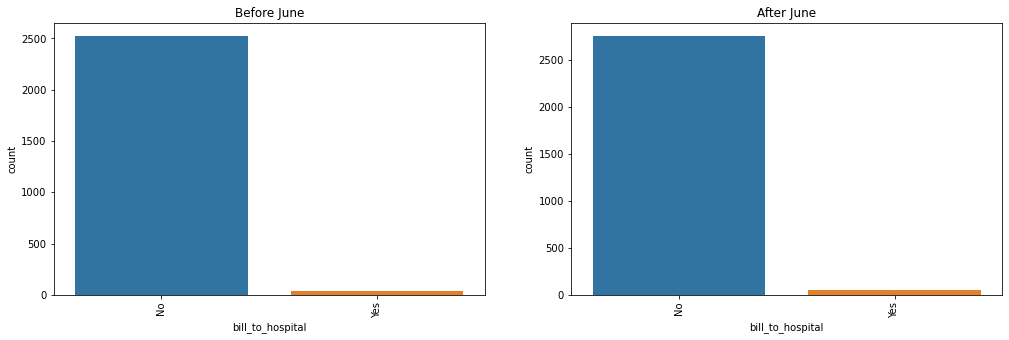

AMBULANCE_TYPE_REQUESTED


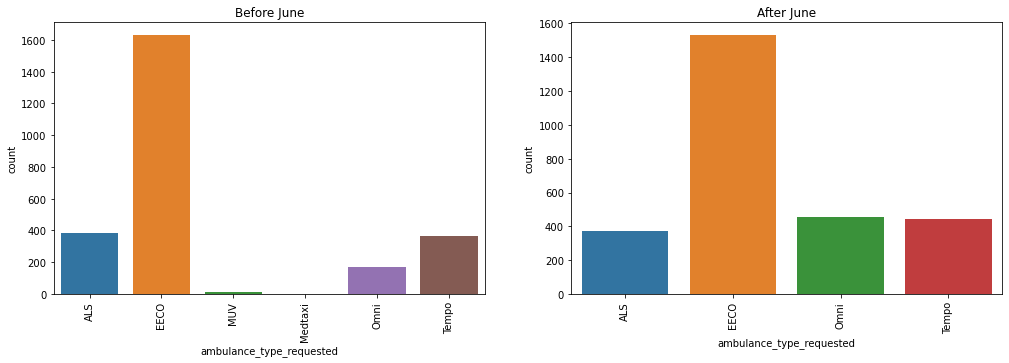

AMBULANCE_TYPE_SENT


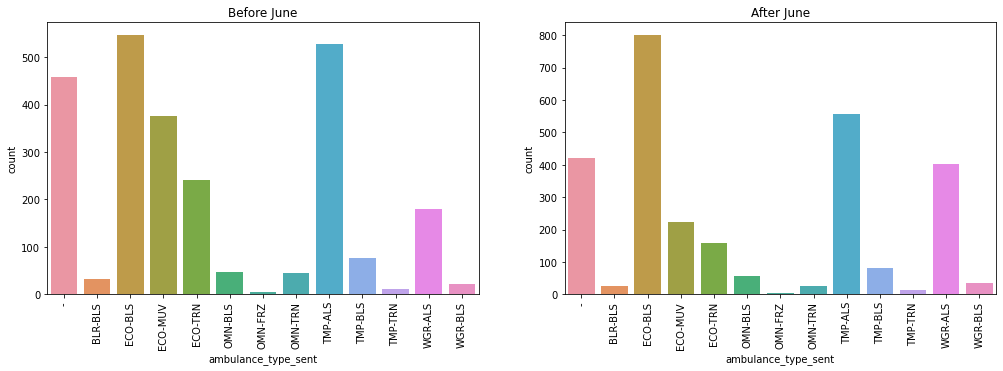

AMBULANCE_COMPANY_ID


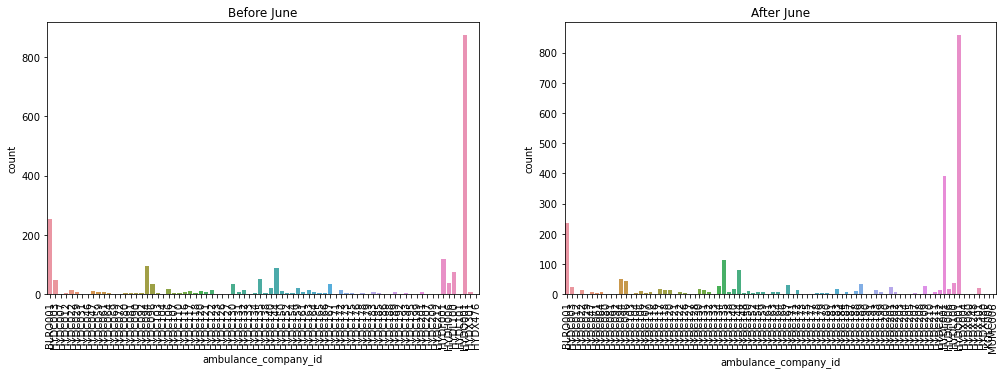

AMBULANCE_OWNERSHIP


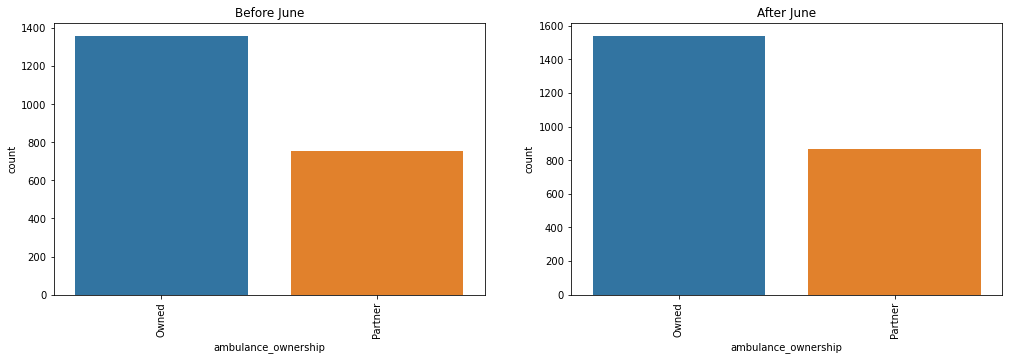

TRIP_TYPE


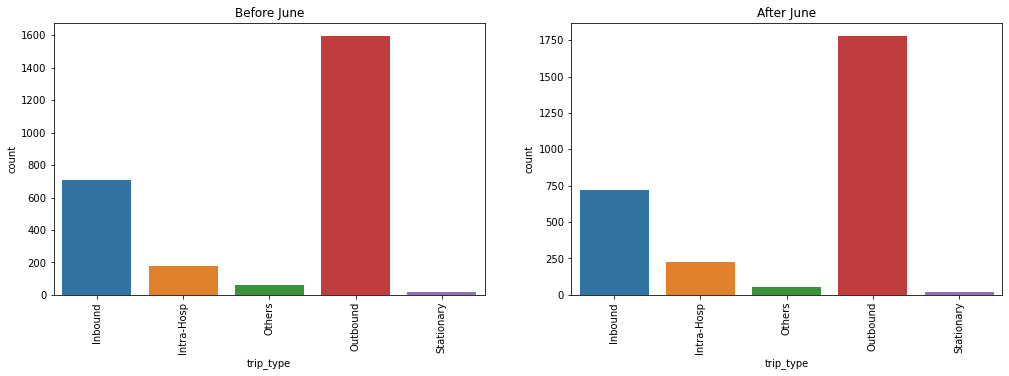

LABEL


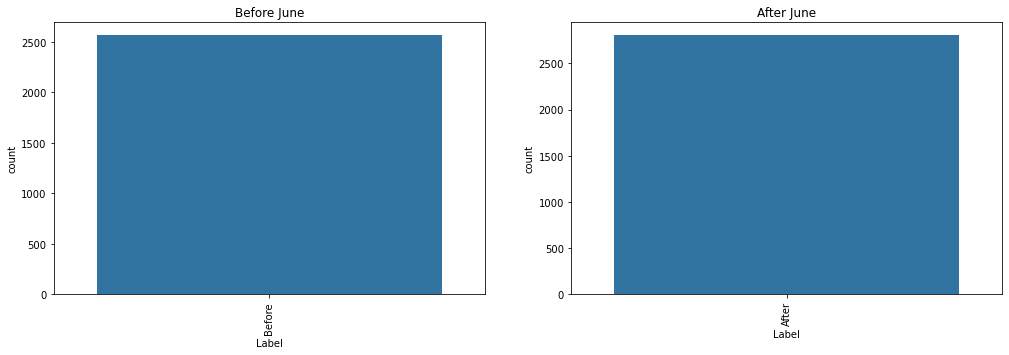

In [40]:
for i in dfcat.drop(['created_on','month','ambulance_id'],1).columns:
    print(i.upper())
    plt.figure(figsize=(17,5))
    plt.subplot(1,2,1)
    plt.title('Before June')
    plt.xticks(rotation=90)
    sns.countplot(before_cat[i],order=np.sort(before_cat[i].dropna().unique()))
    plt.subplot(1,2,2)
    plt.title('After June')
    plt.xticks(rotation=90)
    sns.countplot(after_cat[i],order=np.sort(after_cat[i].dropna().unique()))
    plt.show()

PICKUP_LATITUDE


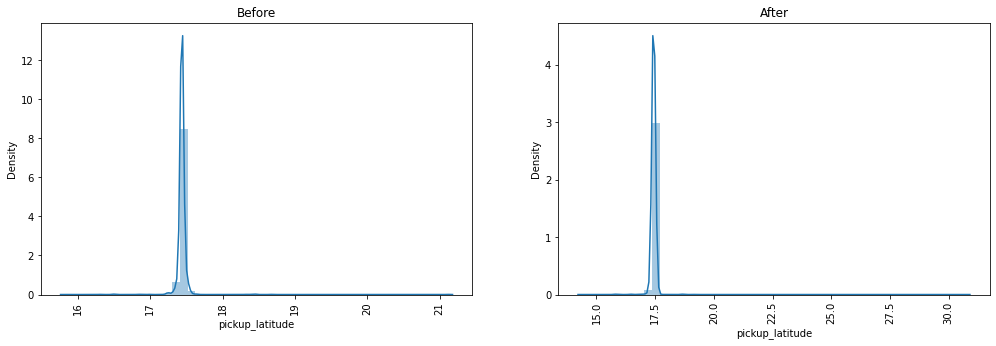



PICKUP_LONGITUDE


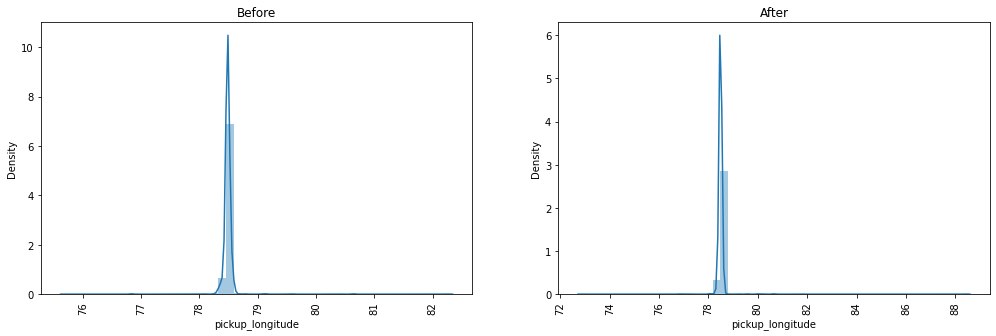



DROP_LATITUDE


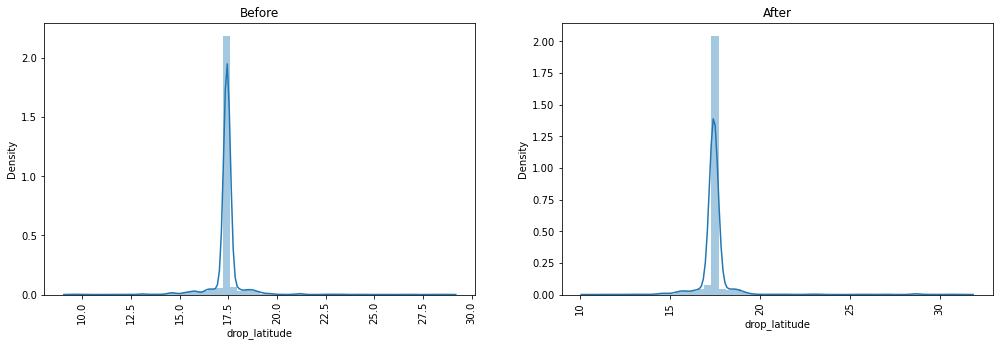



DROP_LONGITUDE


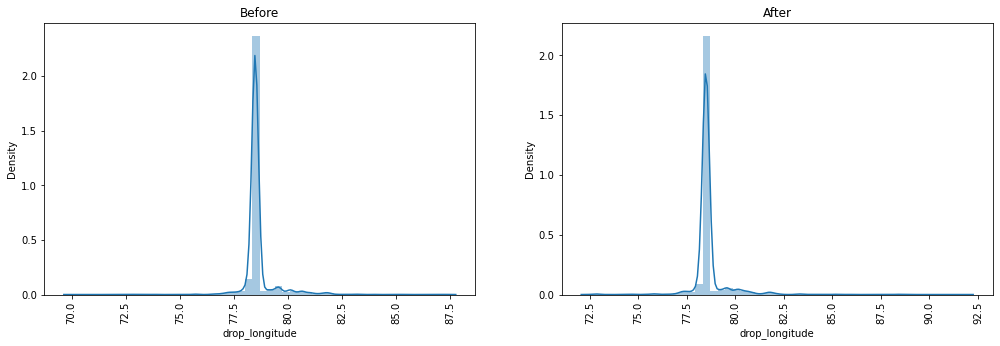



ESTIMATED_DISTANCE_TO_PICKUP_KMS


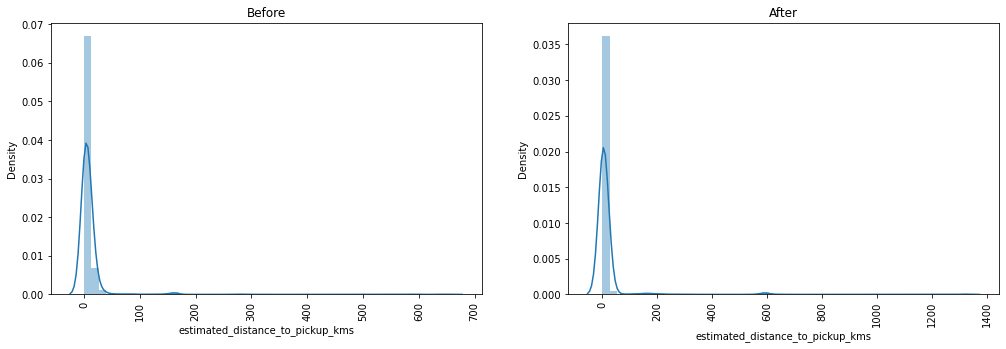



ESTIMATED_TIME_TO_PICKUP_MINS


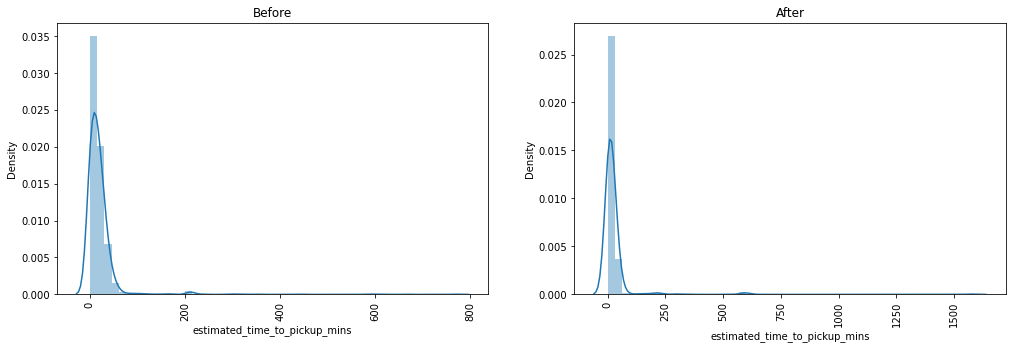



TRIP_DISTANCE_KMS


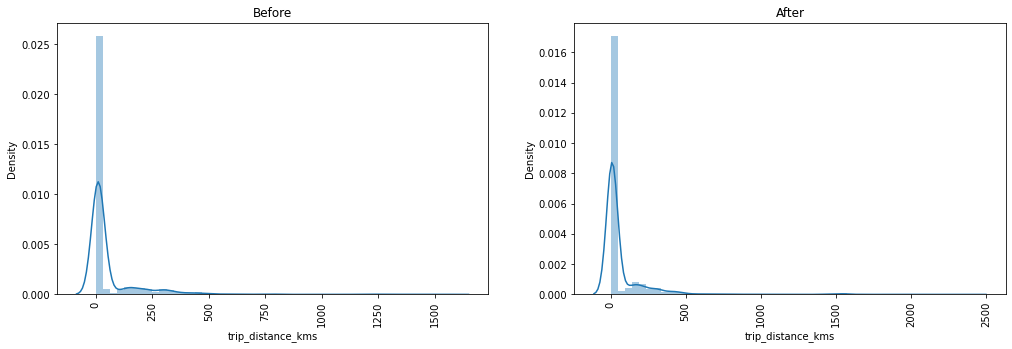



SYSTEM_FARE


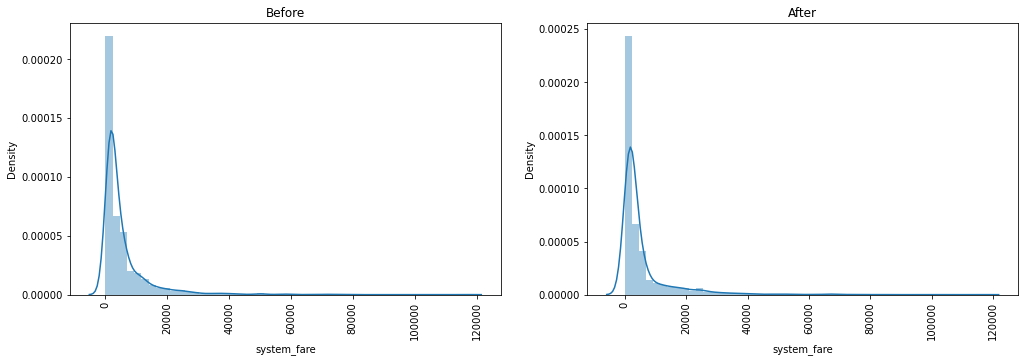



FARE_PROPOSED


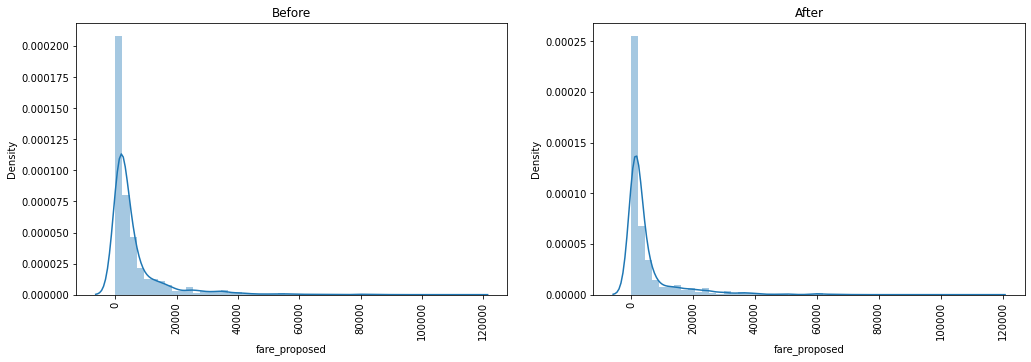



TRIP_FARE_AGREED


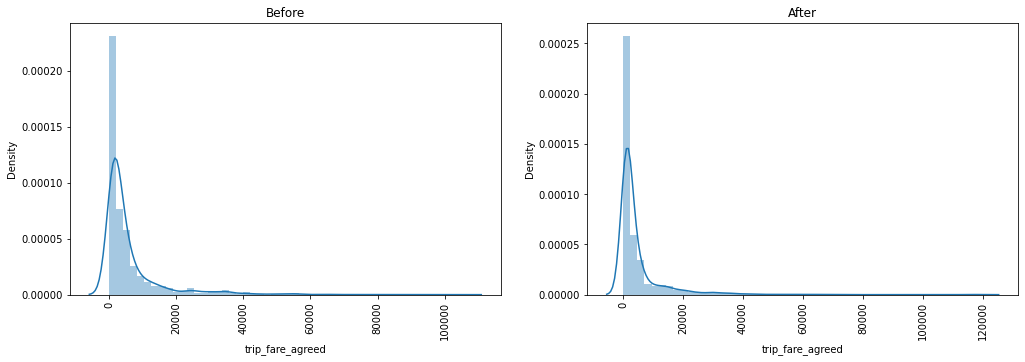



FARE_SYS_VS_PROP


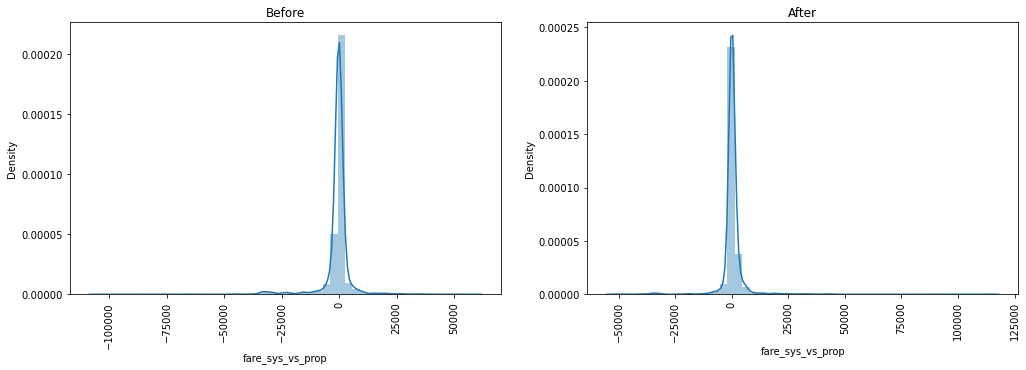



FARE_PROP_VS_AGREED


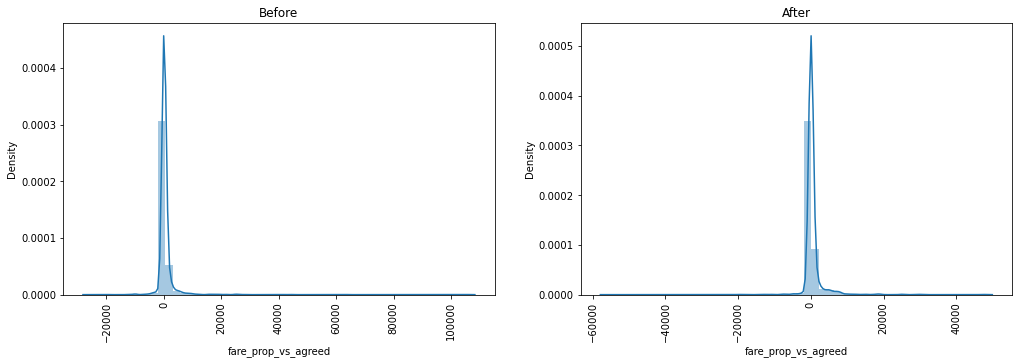



FARE_SYS_VS_AGREED


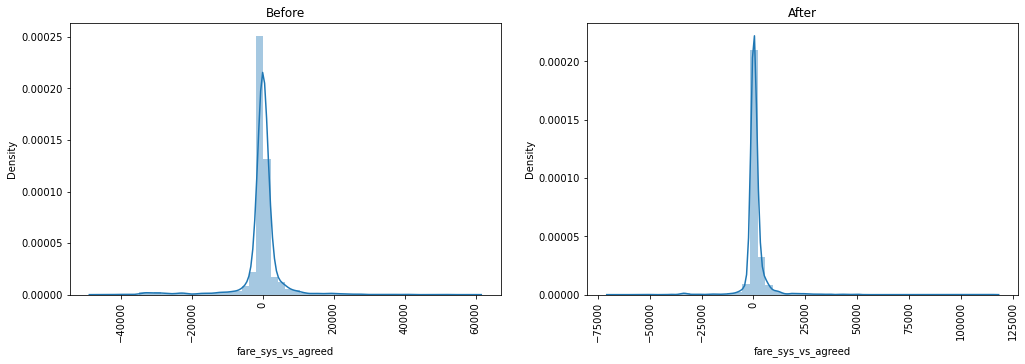



CHANGE


OverflowError: cannot convert float infinity to integer

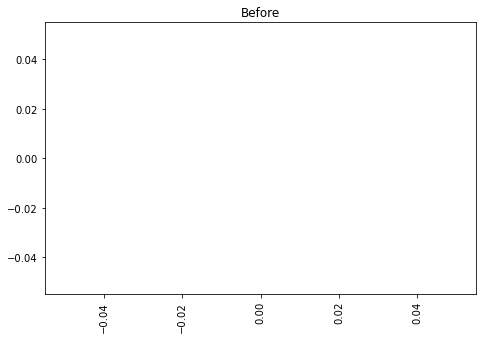

In [41]:
for i in dfnum.columns:
    print(i.upper())
    plt.figure(figsize=(17,5))
    
    plt.subplot(1,2,1)
    plt.title('Before')
    plt.xticks(rotation=90)
    sns.distplot(before_num[i])
    
    plt.subplot(1,2,2)
    plt.title('After')
    plt.xticks(rotation=90)
    sns.distplot(after_num[i])

    plt.show()
    print()
    print()

##### Location changes

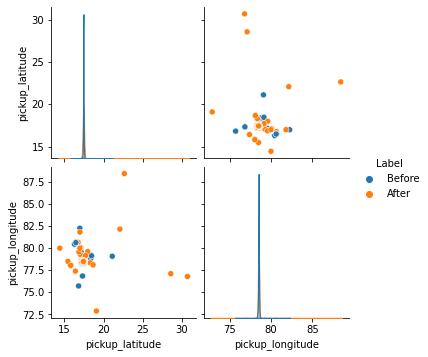

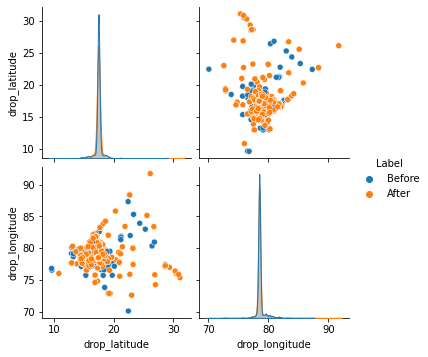

In [42]:
sns.pairplot(data=df,vars=['pickup_latitude', 'pickup_longitude'],hue='Label')
plt.show()
sns.pairplot(data=df,vars=['drop_latitude','drop_longitude'],hue='Label')
plt.show()

#### Agent specific Analysis

In [44]:
pd.DataFrame(pd.crosstab(df.generated_by,df.agent_type))

agent_type    Call Center  Ground Operations  HO
generated_by                                    
Aamir                   2                  0   0
Akram                  15                  0   0
Anil                    0                  0  24
Azhar                   1                  0   0
Bijoy                   0                990   0
Birender               19                  0   0
Chawla                 20                  0   0
Dasari                 20                  0   0
Deven                   0                 77   0
Dhaval                  3                  0   0
Dhruv                   1                  0   0
Divya                   0                  0   1
Dora                   26                  0   0
Emran                   0                  1   0
Farzan                  0               1531   0
Goal                    1                  0   0
Goenka                  6                  0   0
Hasmi                   6                  0   0
Himanshu                1                  0   0
Hinet                   0                 62   0
Honey                   3                  0   0
Ismail                  6                  0   0
Jagdish                14                  0   0
Jinal                   0                  6   0
Karan                   2                  0   0
Kareena                 1                  0   0
Kartik                  1                  0   0
Khusi                   0                  4   0
Kirti                  37                  0   0
Krishna                 2                  0   0
Malla                   0                  1   0
Manali                 10                  0   0
Manohar                 1                  0   0
Mohan                   1                  0   0
Mohd                    6                  0   0
Nagraj                  6                  0   0
Narendra               50                  0   0
Nikhil                 29                  0   0
Nir                    10                  0   0
Noor                    2                  0   0
Parit                  13                  0   0
Parth                   5                  0   0
Pooja                  12                  0   0
Poonam                  1                  0   0
Priyanka               38                  0   0
Rahul                   3                  0   0
Raju                    1                  0   0
Rakul                  21                  0   0
Ram                    11                  0   0
Reddy                   1                  0   0
Rohit                   1                  0   0
Sai                     0                  0   3
Salman                 30                  0   0
Santoshi               15                  0   0
Shantanu               38                  0   0
Sharma                 15                  0   0
Shivansh                0                  0   4
Shubham                 0               1637   0
Srinu                   0                418   0
Sunny                   2                  0   0
Suraj                   3                  0   0
Tharun                 13                  0   0
Umesh                   4                  0   0
Veer                   25                  0   0
Vishal                  3                  0   0
Vishnu                 11                  0   0
Viswa                   9                  0   0
Yamini                  7                  0   0
raju                   24                  0   0

In [46]:
df.groupby(['generated_by','agent_type']).mean()

pickup_latitude  pickup_longitude  \
generated_by agent_type                                             
Aamir        Call Center              17.424018         78.473761   
Akram        Call Center              17.436088         78.480939   
Anil         HO                       17.447851         78.492794   
Azhar        Call Center              17.437450         78.482290   
Bijoy        Ground Operations        17.444139         78.480779   
Birender     Call Center              17.441994         78.480493   
Chawla       Call Center              17.439634         78.483443   
Dasari       Call Center              17.478865         78.543461   
Deven        Ground Operations        17.460207         78.412936   
Dhaval       Call Center              17.421210         78.485895   
Dhruv        Call Center              17.437450         78.482290   
Divya        HO                       17.437450         78.482290   
Dora         Call Center              17.431788         78.488365   
Emran        Ground Operations        17.385742         78.474138   
Farzan       Ground Operations        17.451258         78.492773   
Goal         Call Center              17.492838         78.546902   
Goenka       Call Center              17.429677         78.454903   
Hasmi        Call Center              17.443232         78.491949   
Himanshu     Call Center              17.456254         78.443929   
Hinet        Ground Operations        17.438911         78.481409   
Honey        Call Center              17.453954         78.478247   
Ismail       Call Center              17.649245         78.402301   
Jagdish      Call Center              17.457532         78.473931   
Jinal        Ground Operations        17.421522         78.205781   
Karan        Call Center              17.451254         78.487488   
Kareena      Call Center              17.354479         78.475913   
Kartik       Call Center              17.437450         78.482290   
Khusi        Ground Operations        17.437450         78.482290   
Kirti        Call Center              17.429170         78.510854   
Krishna      Call Center              17.429693         78.467148   
Malla        Ground Operations        17.437571         78.482309   
Manali       Call Center              17.358415         78.686443   
Manohar      Call Center              17.437450         78.482290   
Mohan        Call Center              17.429380         78.438300   
Mohd         Call Center              17.453383         78.478077   
Nagraj       Call Center              17.458675         78.513446   
Narendra     Call Center              17.423021         78.532484   
Nikhil       Call Center              17.469207         78.504053   
Nir          Call Center              17.445456         78.494171   
Noor         Call Center              17.947068         78.808679   
Parit        Call Center              17.420503         78.466433   
Parth        Call Center              17.373161         78.639380   
Pooja        Call Center              17.401103         78.775776   
Poonam       Call Center              17.519697         78.458642   
Priyanka     Call Center              17.477751         78.473326   
Rahul        Call Center              17.850749         78.368537   
Raju         Call Center              17.455312         78.483186   
Rakul        Call Center              17.438548         78.475983   
Ram          Call Center              17.396910         78.635966   
Reddy        Call Center              17.368466         78.531594   
Rohit        Call Center              17.437571         78.482309   
Sai          HO                       17.437450         78.482290   
Salman       Call Center              17.436215         78.476472   
Santoshi     Call Center              17.437888         78.487043   
Shantanu     Call Center              17.434285         78.484752   
Sharma       Call Center              17.423949         78.586766   
Shivansh     HO               

In [48]:
agent_leads=pd.crosstab(df.generated_by,df.month)
agent_leads

month         01 2021  02 2021  03 2021  04 2021  05 2021  06 2021  07 2021  \
generated_by                                                                  
Aamir               1        0        0        0        1        0        0   
Akram               1        2        0        0        0        1        0   
Anil                5        2        6        7        1        0        0   
Azhar               0        0        0        0        0        0        0   
Bijoy             116       93       96      105       56       70       89   
Birender            5        4        1        2        1        1        0   
Chawla              4        3        4        7        0        0        0   
Dasari              0        0        0        4        1        4        0   
Deven               0        0        0        0        0        0        0   
Dhaval              0        0        0        1        0        1        0   
Dhruv               0        0        0        1        0        0        0   
Divya               1        0        0        0        0        0        0   
Dora                0        0        1        1        1        3        2   
Emran               0        0        0        0        0        0        0   
Farzan            124      143      151      175      167      104      109   
Goal                0        0        0        0        0        0        1   
Goenka              0        0        0        3        1        1        1   
Hasmi               0        1        0        0        0        0        0   
Himanshu            0        0        0        0        0        0        0   
Hinet               1        3        1        1        0        3        0   
Honey               0        0        0        0        0        0        0   
Ismail              0        0        0        0        1        0        4   
Jagdish             0        0        3        1        1        2        0   
Jinal               0        1        1        0        2        0        0   
Karan               1        0        1        0        0        0        0   
Kareena             0        0        0        0        0        0        1   
Kartik              0        0        0        1        0        0        0   
Khusi               0        0        0        0        0        0        0   
Kirti               3        4        6       10        5        1        3   
Krishna             1        0        0        0        0        0        0   
Malla               0        0        0        0        0        0        0   
Manali              4        2        1        2        1        0        0   
Manohar             0        1        0        0        0        0        0   
Mohan               0        1        0        0        0        0        0   
Mohd                0        0        0        0        0        1        0   
Nagraj              0        0        0        0        0        0        0   
Narendra            3        0        6       10        3        3        6   
Nikhil              1        1        8        1        2        0        1   
Nir                 0        0        1        0        0        0        0   
Noor                0        0        0        0        2        0        0   
Parit               1        0        0        0        0        4        0   
Parth               0        0        0        0        0        2        1   
Pooja               0        3        0        0        1        1        2   
Poonam              0        0        0        0        0        0        1   
Priyanka            6        2        0        3        4        1        4   
Rahul               0        0        0        3        0        0        0   
Raju                0        0        0        1        0        0        0   
Rakul               1        0        1        0        0        4        2   
Ram                 1        1        0        1  

In [49]:
agent_leads.set_index(df.groupby(['generated_by','agent_type']).mean().index)

month                           01 2021  02 2021  03 2021  04 2021  05 2021  \
generated_by agent_type                                                       
Aamir        Call Center              1        0        0        0        1   
Akram        Call Center              1        2        0        0        0   
Anil         HO                       5        2        6        7        1   
Azhar        Call Center              0        0        0        0        0   
Bijoy        Ground Operations      116       93       96      105       56   
Birender     Call Center              5        4        1        2        1   
Chawla       Call Center              4        3        4        7        0   
Dasari       Call Center              0        0        0        4        1   
Deven        Ground Operations        0        0        0        0        0   
Dhaval       Call Center              0        0        0        1        0   
Dhruv        Call Center              0        0        0        1        0   
Divya        HO                       1        0        0        0        0   
Dora         Call Center              0        0        1        1        1   
Emran        Ground Operations        0        0        0        0        0   
Farzan       Ground Operations      124      143      151      175      167   
Goal         Call Center              0        0        0        0        0   
Goenka       Call Center              0        0        0        3        1   
Hasmi        Call Center              0        1        0        0        0   
Himanshu     Call Center              0        0        0        0        0   
Hinet        Ground Operations        1        3        1        1        0   
Honey        Call Center              0        0        0        0        0   
Ismail       Call Center              0        0        0        0        1   
Jagdish      Call Center              0        0        3        1        1   
Jinal        Ground Operations        0        1        1        0        2   
Karan        Call Center              1        0        1        0        0   
Kareena      Call Center              0        0        0        0        0   
Kartik       Call Center              0        0        0        1        0   
Khusi        Ground Operations        0        0        0        0        0   
Kirti        Call Center              3        4        6       10        5   
Krishna      Call Center              1        0        0        0        0   
Malla        Ground Operations        0        0        0        0        0   
Manali       Call Center              4        2        1        2        1   
Manohar      Call Center              0        1        0        0        0   
Mohan        Call Center              0        1        0        0        0   
Mohd         Call Center              0        0        0        0        0   
Nagraj       Call Center              0        0        0        0        0   
Narendra     Call Center              3        0        6       10        3   
Nikhil       Call Center              1        1        8        1        2   
Nir          Call Center              0        0        1        0        0   
Noor         Call Center              0        0        0        0        2   
Parit        Call Center              1        0        0        0        0   
Parth        Call Center              0        0        0        0        0   
Pooja        Call Center              0        3        0        0        1   
Poonam       Call Center              0        0        0        0        0   
Priyanka     Call Center              6        2        0        3        4   
Rahul        Call Center              0        0        0        3        0   
Raju         Call Center              0        0        0        1        0   
Rakul        Call Center              1        0        1        0        0   
Ram          Call Center              1        1  

#### Agent-Type 

In [52]:
agent_type_discount= pd.pivot_table(data=df,index='agent_type',columns='month',values='fare_sys_vs_prop',aggfunc='mean')
agent_type_discount.replace({np.nan:0},inplace=True)
agent_type_discount=agent_type_discount.T
agent_type_discount

agent_type  Call Center  Ground Operations           HO
month                                                  
01 2021      264.895614        -772.108401  -357.723333
02 2021     -251.355909          98.068505  -948.500000
03 2021      177.998214         189.909935   253.553333
04 2021      197.124267        -915.983662    52.644444
05 2021      413.625000       -2495.598048  -807.485000
06 2021     1274.300488         209.452407     0.000000
07 2021      894.752174        -169.723490     0.000000
08 2021      355.915227         390.002728  2705.480000
09 2021      202.161000         580.102557   438.600000
10 2021        9.102041         377.626542     0.000000
11 2021      966.803922         821.107354   -15.000000
12 2021      968.318246        -234.200177     0.000000

In [53]:
agent_type_revenue= pd.pivot_table(data=df,index='agent_type',columns='month',values='trip_fare_agreed',aggfunc='sum')
agent_type_revenue.replace({np.nan:0},inplace=True)
agent_type_revenue=agent_type_revenue.T
agent_type_revenue

agent_type  Call Center  Ground Operations       HO
month                                              
01 2021        176700.0          2175650.0  15800.0
02 2021        180091.0          1922300.0   3800.0
03 2021        146990.0          2122750.0  37900.0
04 2021        495210.0          3360900.0  32600.0
05 2021        172752.0          4107800.0  11700.0
06 2021         92102.0          2037561.0      0.0
07 2021        101945.0          1744424.0      0.0
08 2021        158261.0          1888196.0  15000.0
09 2021        160703.0          1648950.0  13600.0
10 2021        109750.0          1756252.0      0.0
11 2021        120802.0          1494851.0   1600.0
12 2021        187551.0          1844950.0      0.0

CALL CENTER


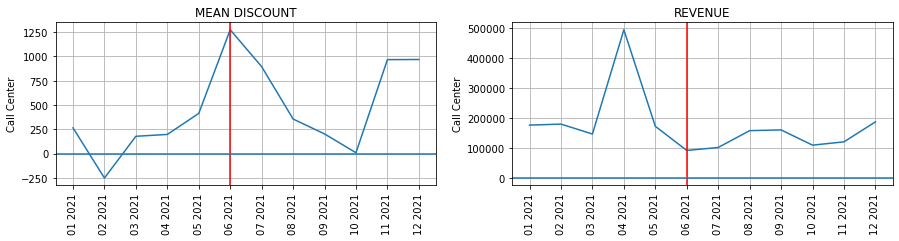



GROUND OPERATIONS


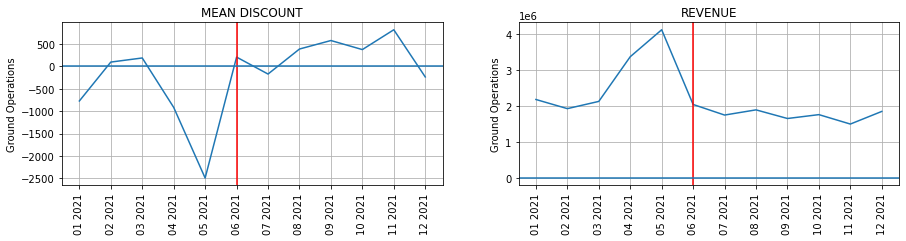



HO


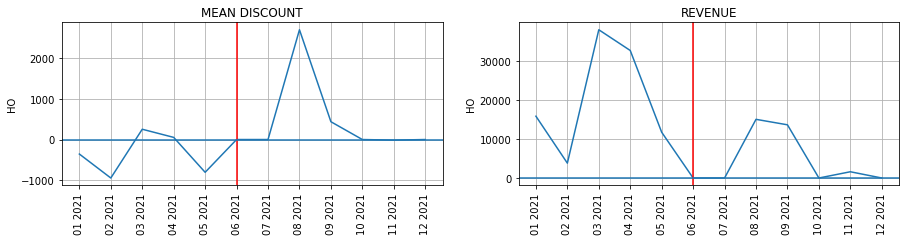

In [54]:
for i in agent_type_discount.columns:
    print(i.upper())
    plt.figure(figsize=(15,3))
    
    plt.subplot(1,2,1)
    plt.title('MEAN DISCOUNT')
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.plot(agent_type_discount[i])
    plt.axvline(x='06 2021',color='red')
    plt.axhline(y=0)
    plt.grid(visible=True, which='major', axis='both')
    
    plt.subplot(1,2,2)
    plt.title('REVENUE')
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.plot(agent_type_revenue[i])
    plt.axvline(x='06 2021',color='red')
    plt.axhline(y=0)
    plt.grid(visible=True, which='major', axis='both')
    plt.show()
    print()
    print()

In [55]:
df[['trip_distance_kms', 'system_fare',
       'fare_proposed', 'trip_fare_agreed', 'fare_sys_vs_prop',
       'fare_prop_vs_agreed', 'fare_sys_vs_agreed', 'cost_to_owner',
       'hospital_margin','cancellation_amount_hospital',
       'cancellation_amount_operator','change', 'discount']].groupby(df.Label).mean()[['trip_distance_kms', 'system_fare',
       'fare_proposed', 'trip_fare_agreed', 'fare_sys_vs_agreed', 'discount']]

trip_distance_kms  system_fare  fare_proposed  trip_fare_agreed  \
Label                                                                     
After           66.876967  5608.520155    5275.116619       4770.505706   
Before          58.206020  5623.280859    6311.464690       5838.058135   

        fare_sys_vs_agreed   discount  
Label                                  
After           838.014449  22.275238  
Before         -214.777276  16.785981

In [57]:
df[df.discount!=0].discount

6        12.348747
9       100.000000
10       27.601810
11        8.814590
12       40.745904
13       25.501433
14       14.078767
15       27.272727
16       17.117497
17       12.959381
19        4.000000
21        5.882353
24       17.241379
25        0.355872
26        8.081319
32        5.325444
33       29.113924
36        9.909910
37      100.000000
38       34.426230
41       10.583583
45       18.367347
47        1.768173
48       20.265781
50       13.043478
52       14.590747
53      100.000000
55       12.087912
56        7.857880
59       27.360775
61        8.814590
65      100.000000
66       24.859939
72      100.000000
74       25.187032
78       14.577080
80       39.393939
81       11.111111
85       63.248806
89      100.000000
93        2.439024
94        7.692308
95       25.221974
97       11.980440
98        2.439024
99        4.761905
100      14.003765
101      22.388060
102      24.210526
103      23.451071
104     100.000000
105     100.000000
107      20.

In [58]:
df[df.discount.isin([np.inf,-np.inf])].shape

(0, 37)

In [59]:
agent_discount= pd.pivot_table(data=df,index='month',columns='generated_by',values='discount',aggfunc='mean')
agent_discount.replace({np.nan:0},inplace=True)

AAMIR


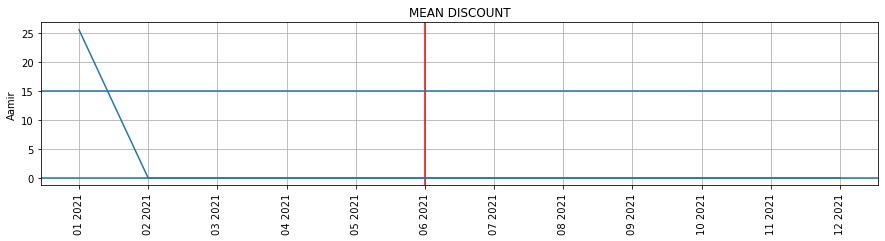



AKRAM


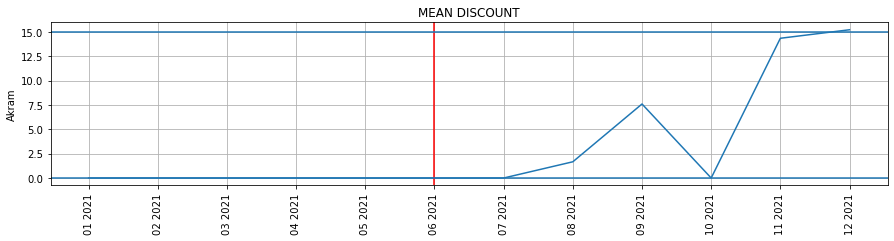



ANIL


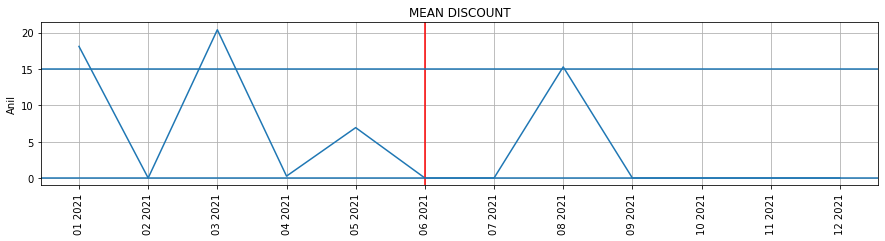



AZHAR


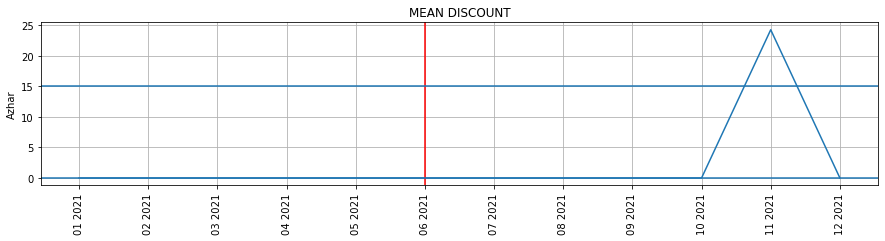



BIJOY


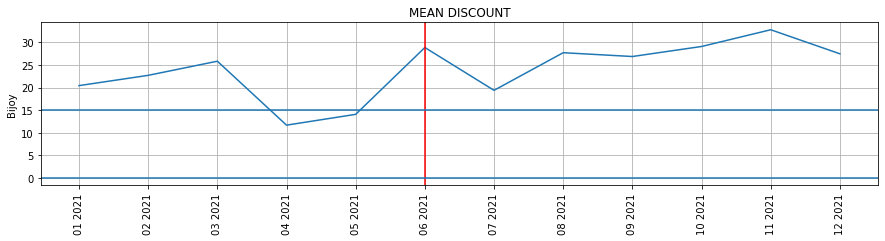



BIRENDER


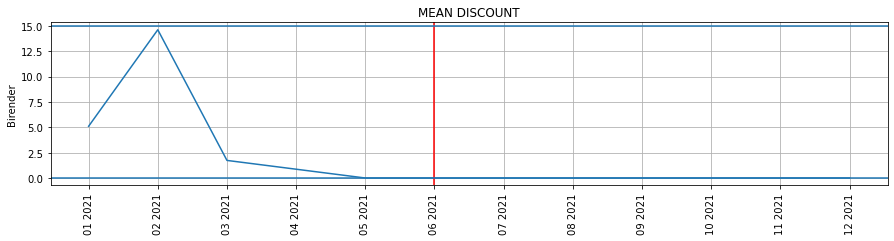



CHAWLA


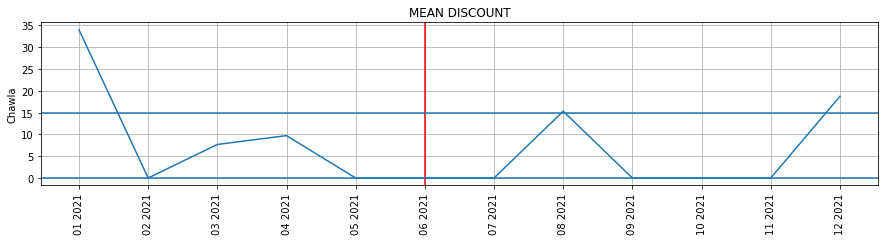



DASARI


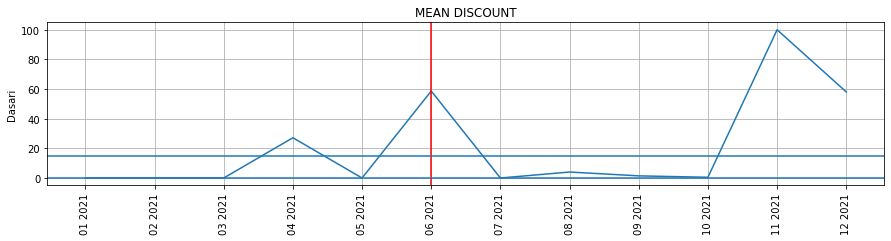



DEVEN


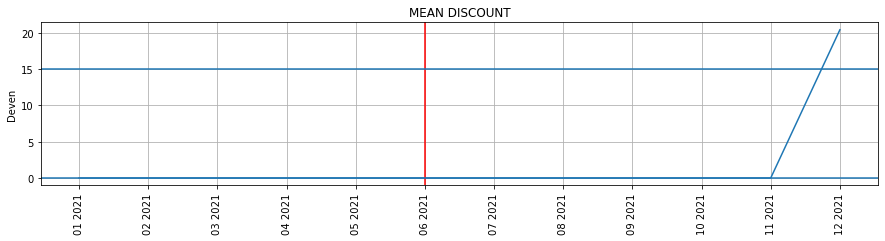



DHAVAL


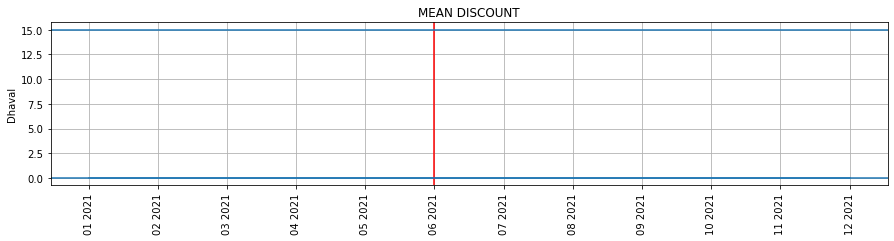



DHRUV


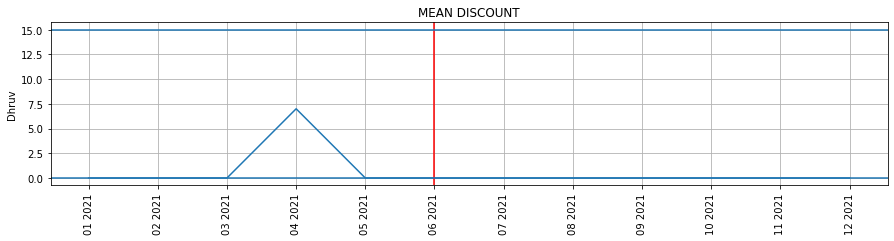



DIVYA


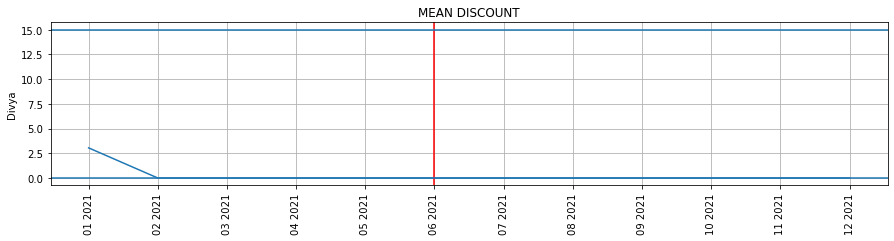



DORA


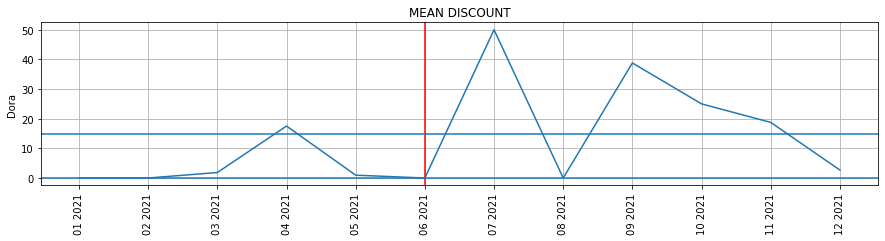



EMRAN


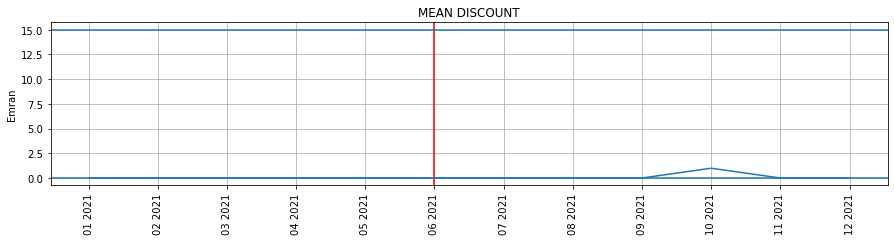



FARZAN


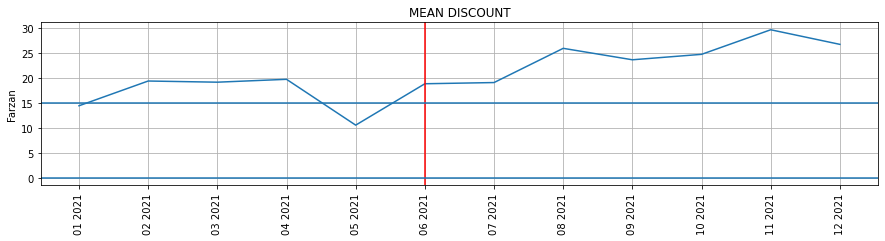



GOAL


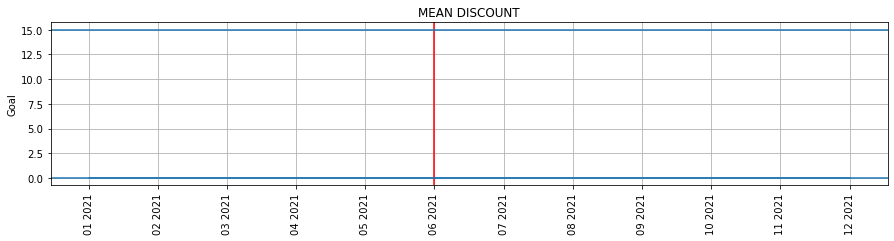



GOENKA


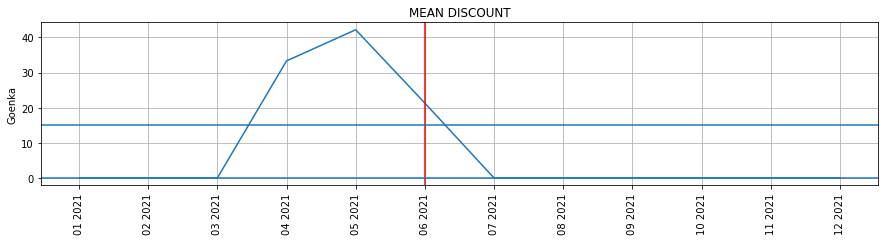



HASMI


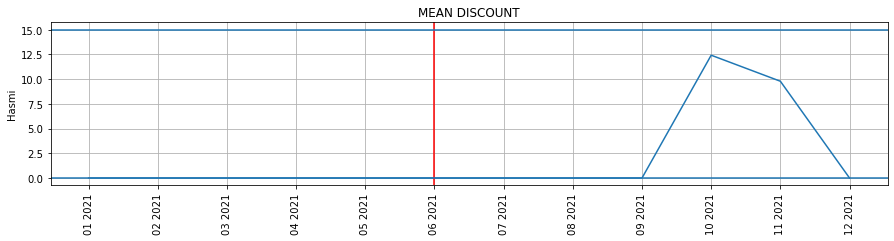



HIMANSHU


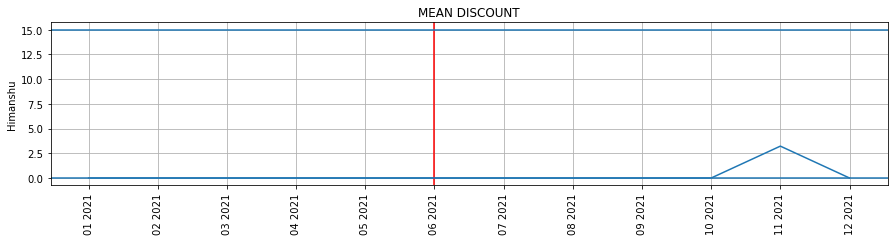



HINET


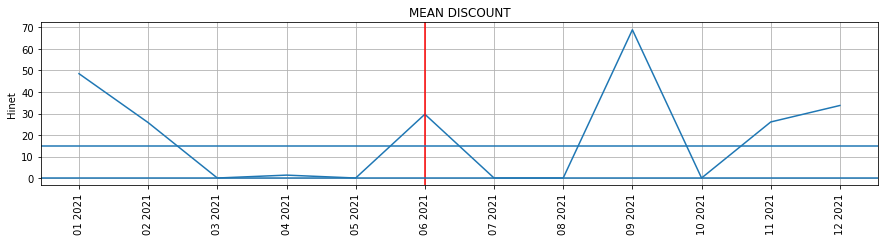



HONEY


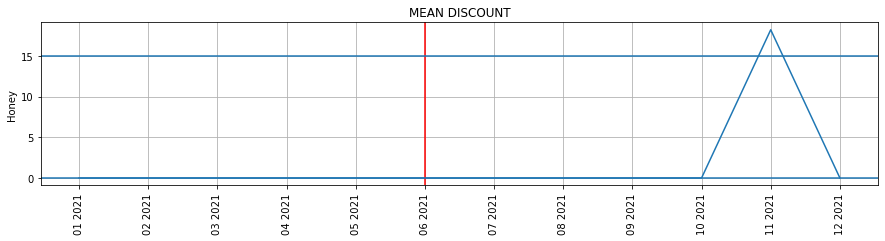



ISMAIL


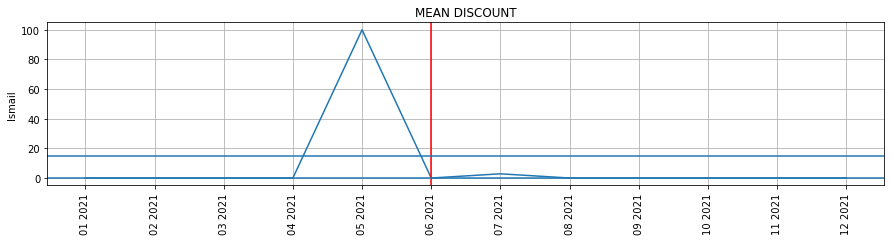



JAGDISH


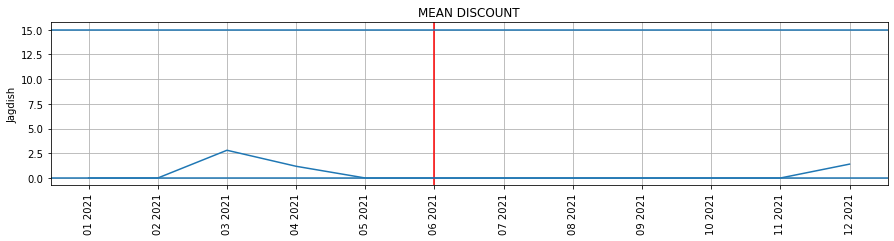



JINAL


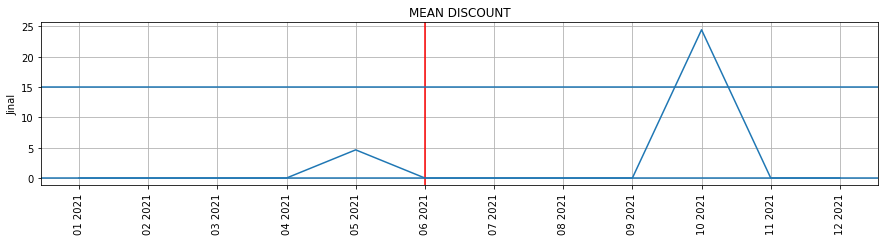



KARAN


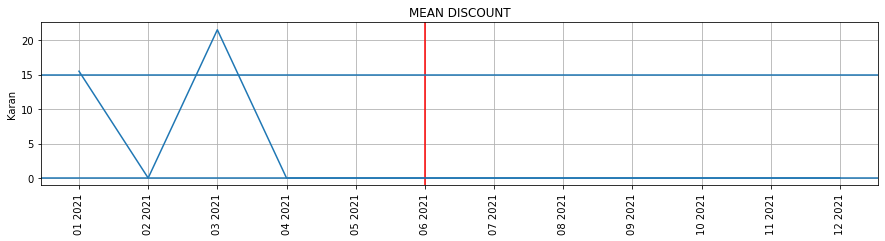



KAREENA


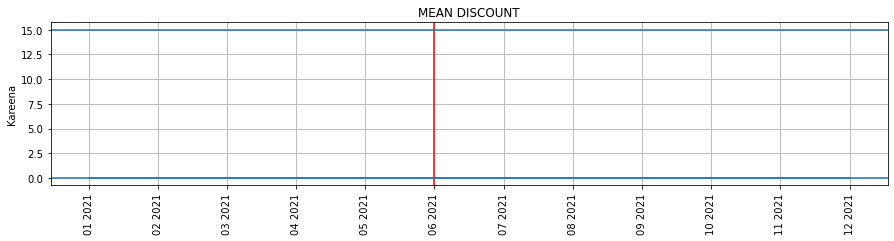



KARTIK


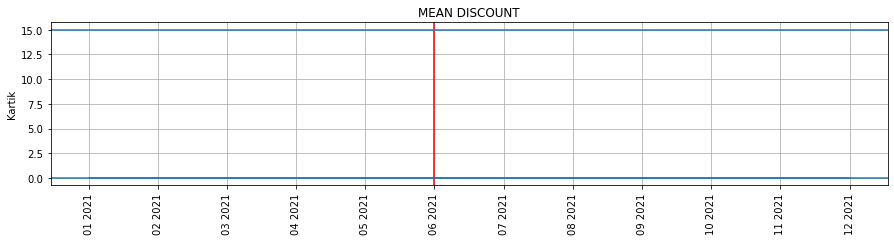



KHUSI


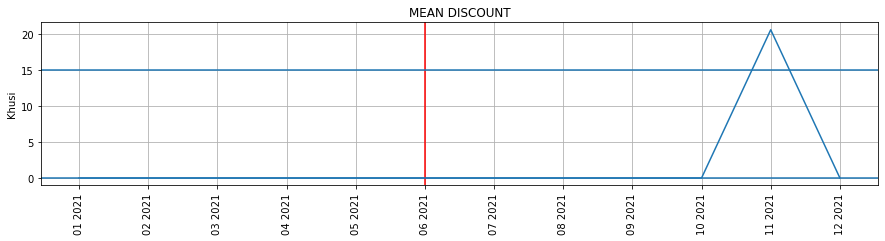



KIRTI


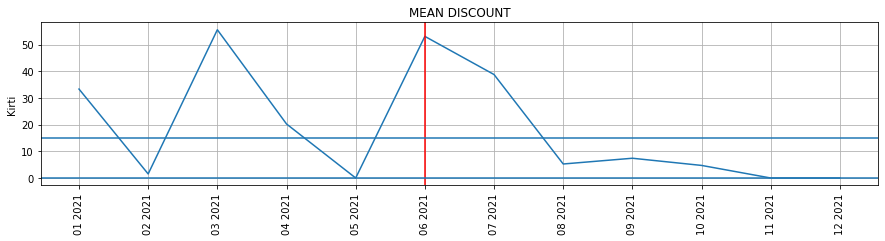



KRISHNA


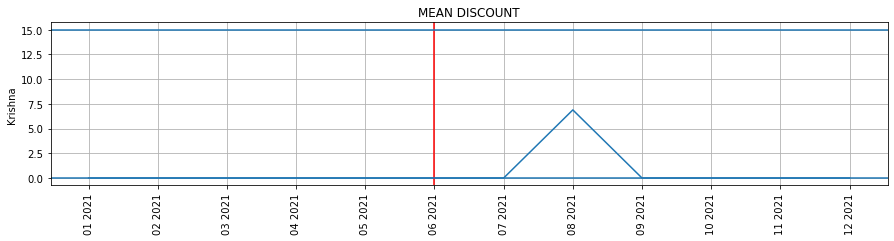



MALLA


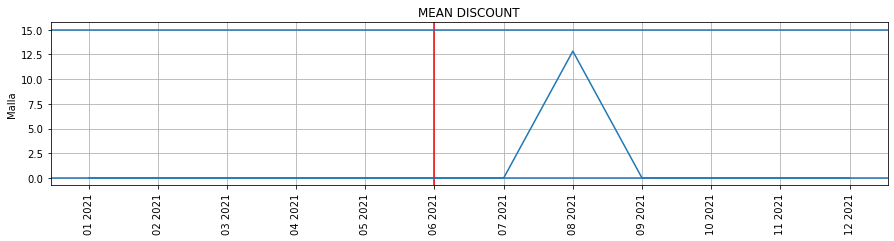



MANALI


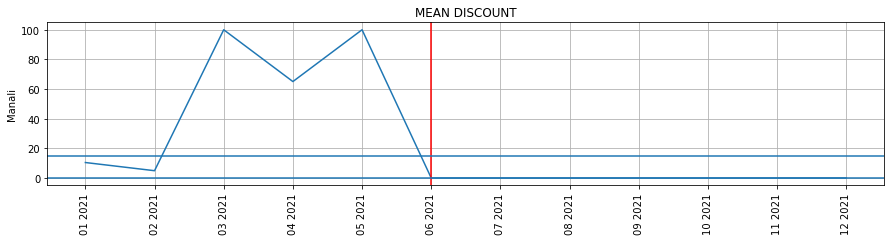



MANOHAR


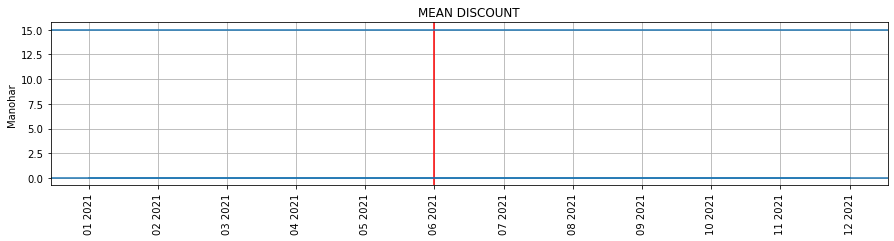



MOHAN


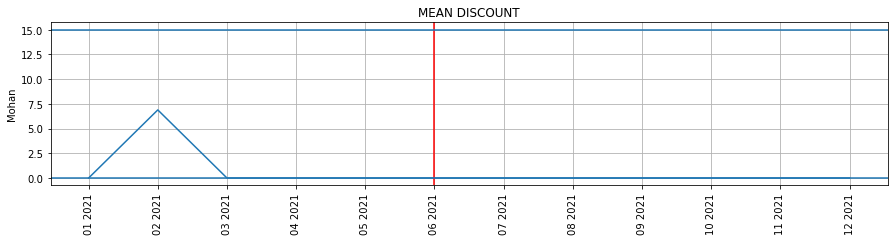



MOHD


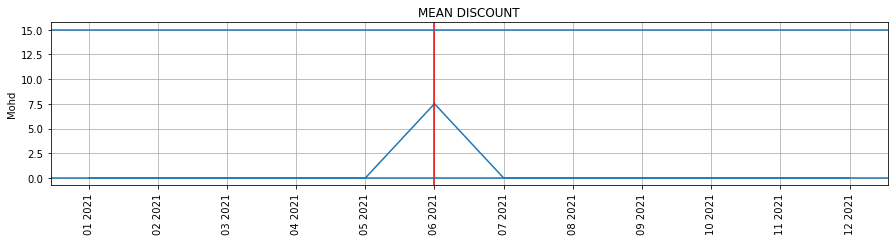



NAGRAJ


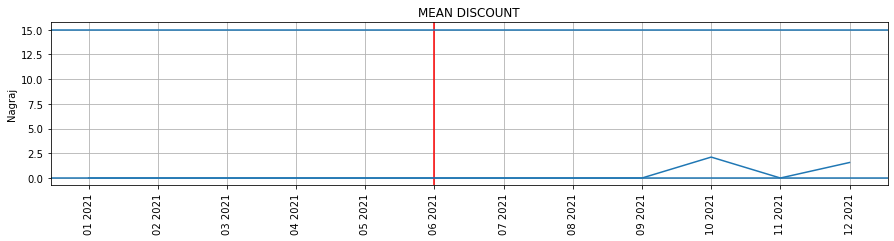



NARENDRA


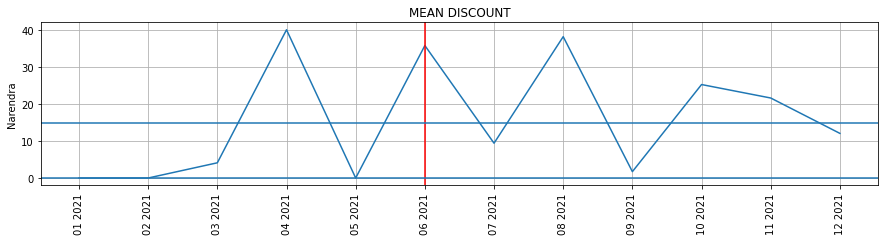



NIKHIL


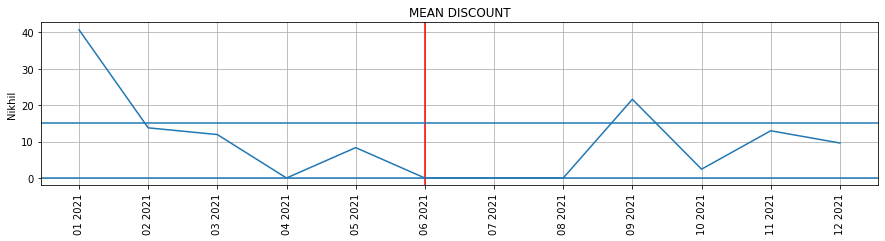



NIR


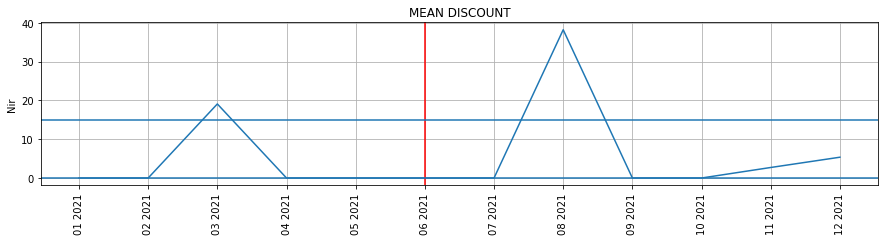



NOOR


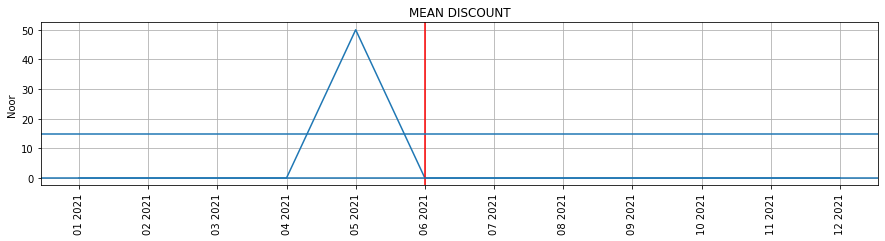



PARIT


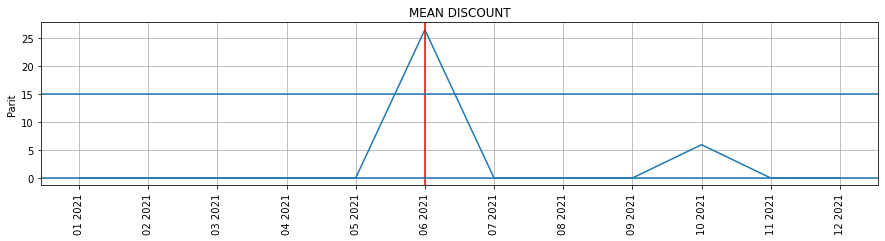



PARTH


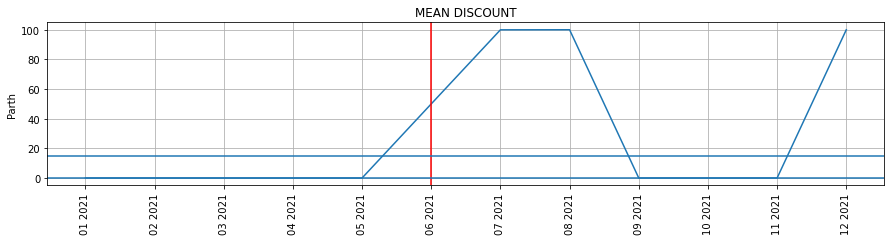



POOJA


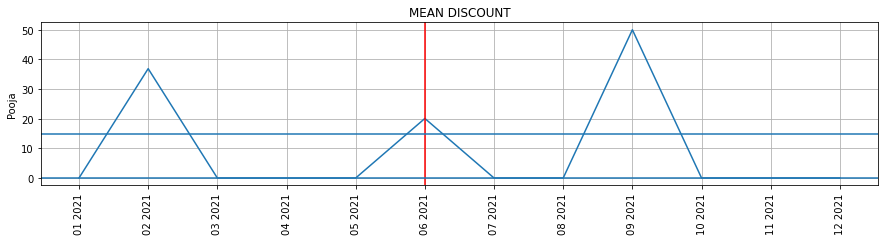



POONAM


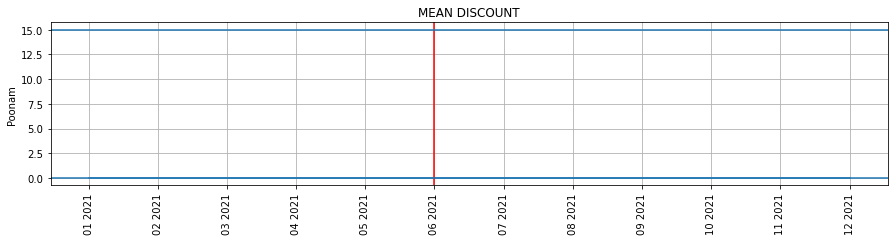



PRIYANKA


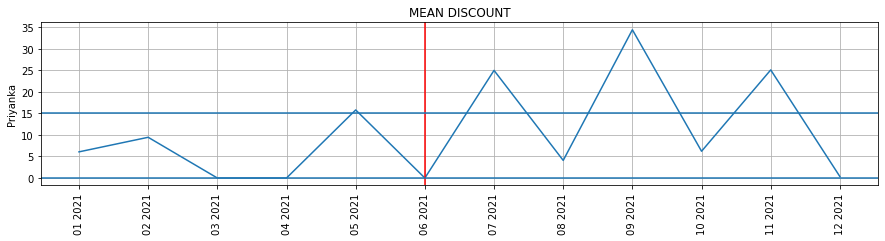



RAHUL


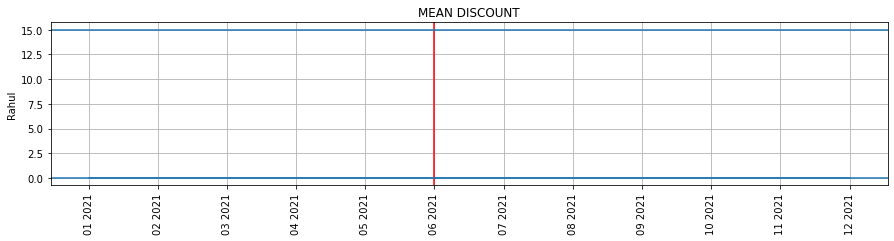



RAJU


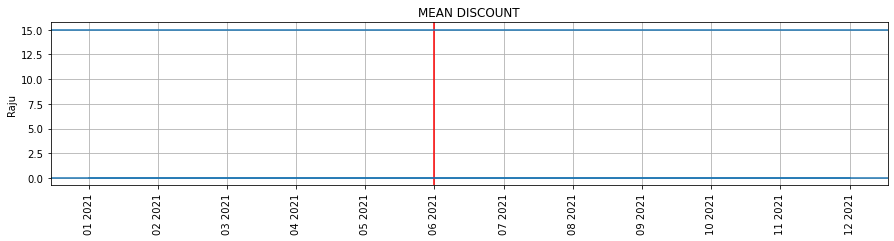



RAKUL


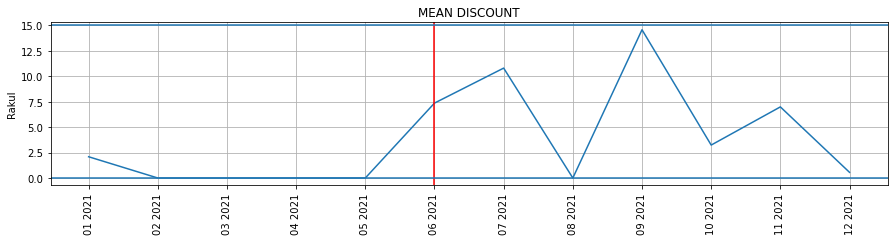



RAM


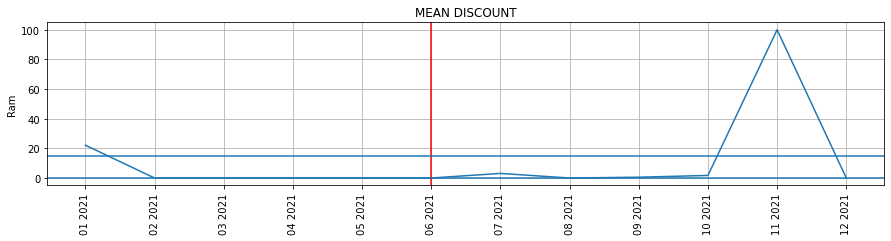



REDDY


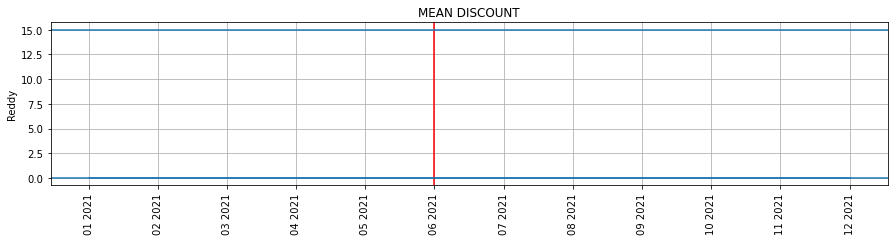



ROHIT


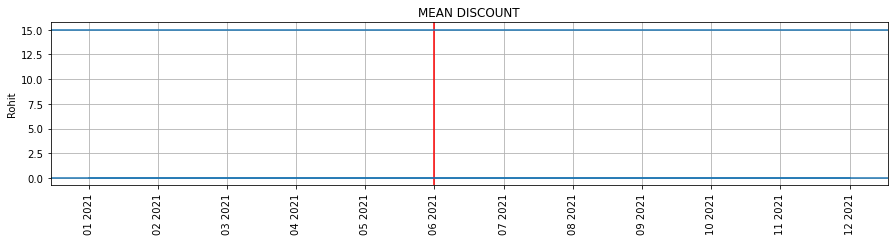



SAI


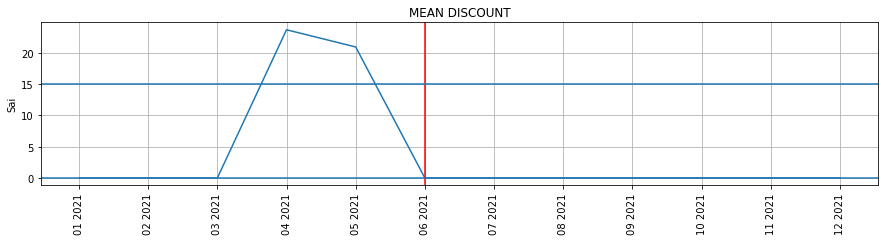



SALMAN


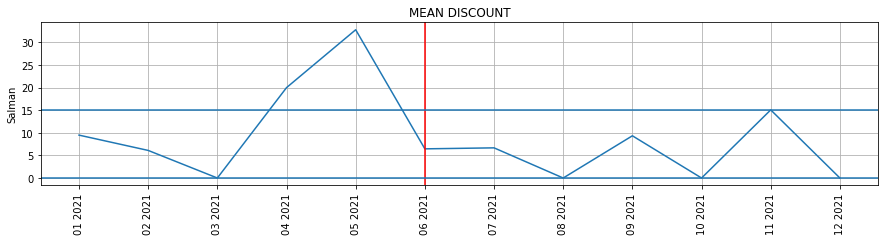



SANTOSHI


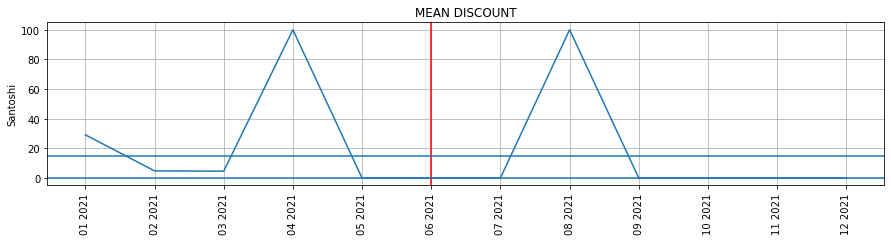



SHANTANU


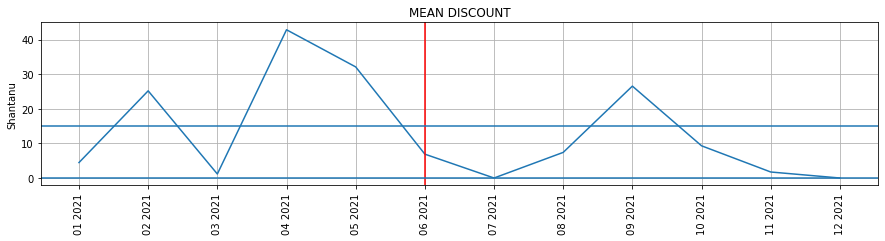



SHARMA


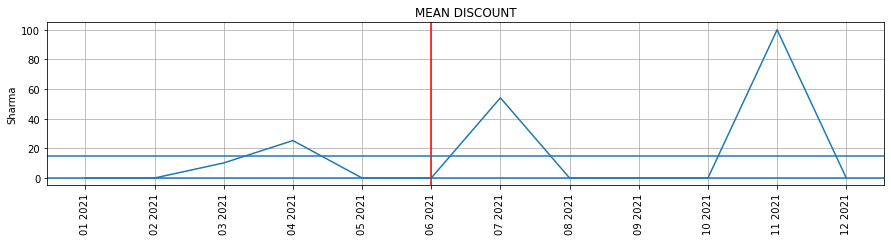



SHIVANSH


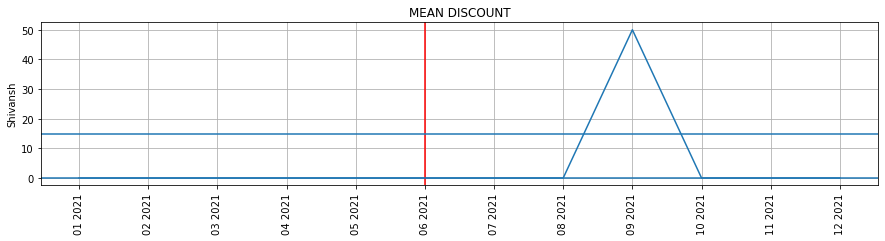



SHUBHAM


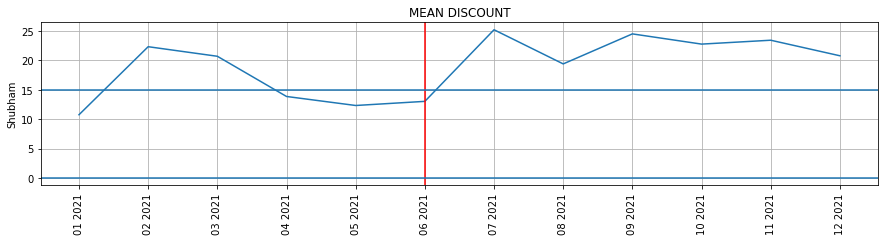



SRINU


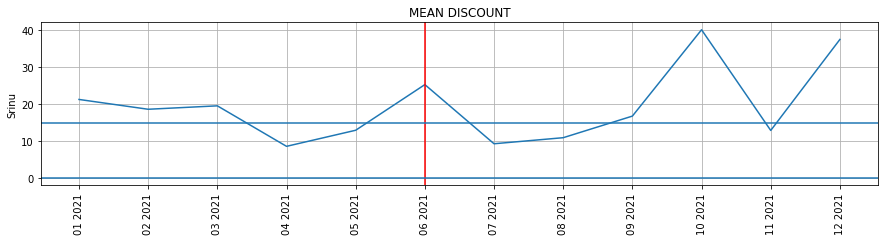



SUNNY


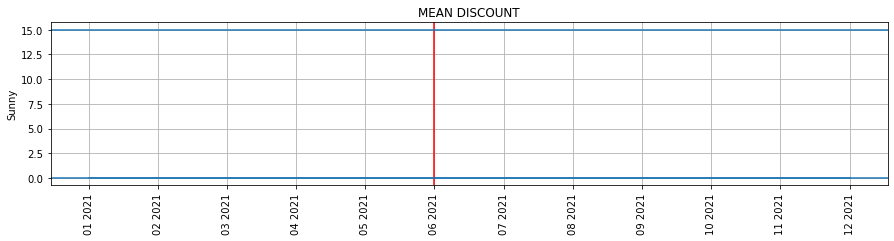



SURAJ


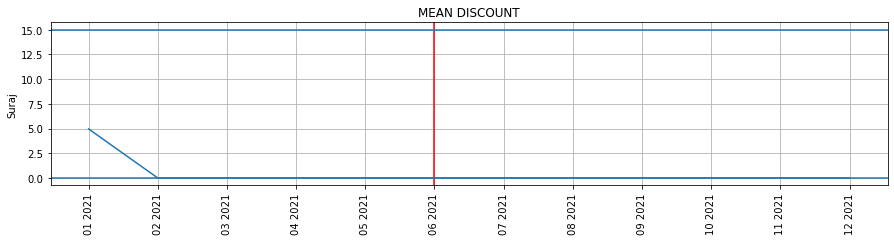



THARUN


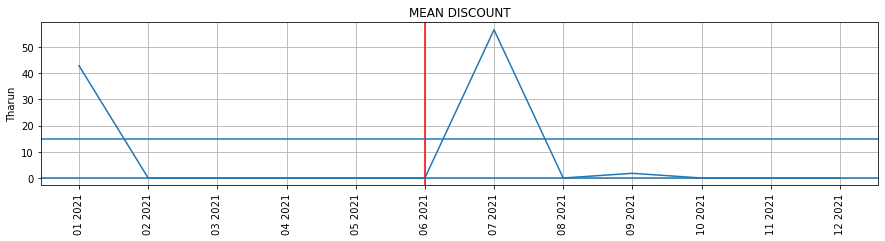



UMESH


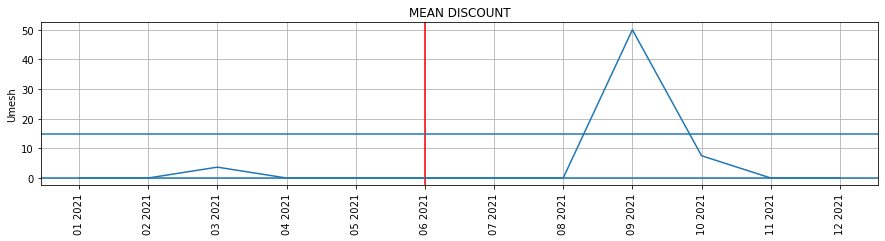



VEER


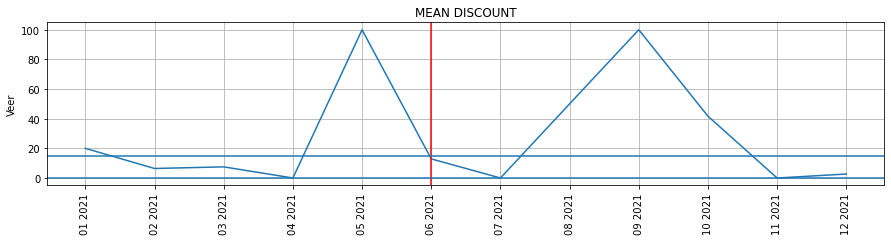



VISHAL


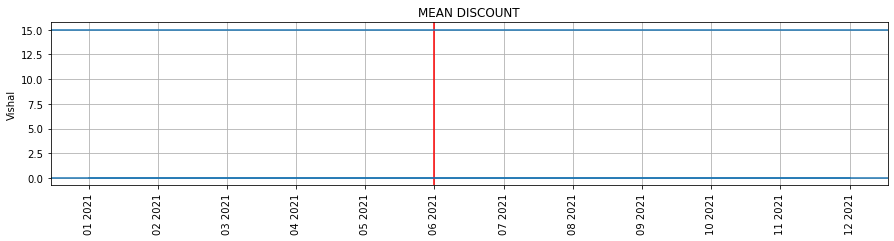



VISHNU


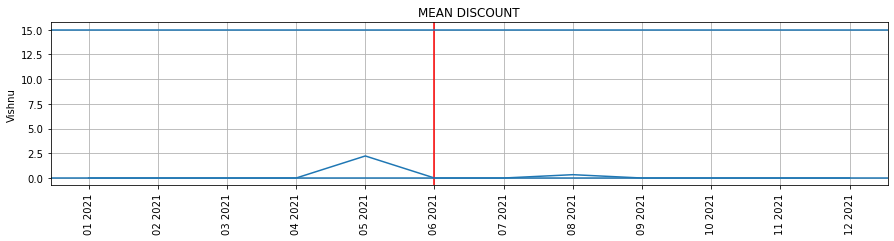



VISWA


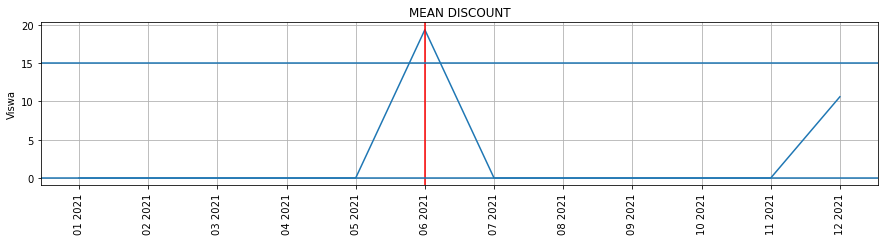



YAMINI


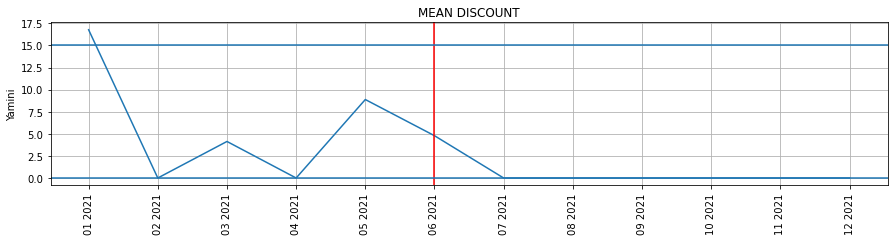



RAJU


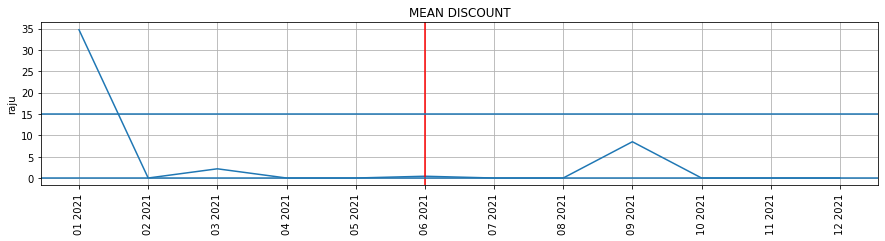

In [60]:
for i in agent_discount.columns:
    print(i.upper())
    plt.figure(figsize=(15,3))
    plt.title('MEAN DISCOUNT')
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.plot(agent_discount[i])
    plt.axvline(x='06 2021',color='red')
    plt.axhline(y=15)
    plt.axhline(y=0)
    plt.grid(visible=True, which='major', axis='both')
    plt.show()
    print()
    print()

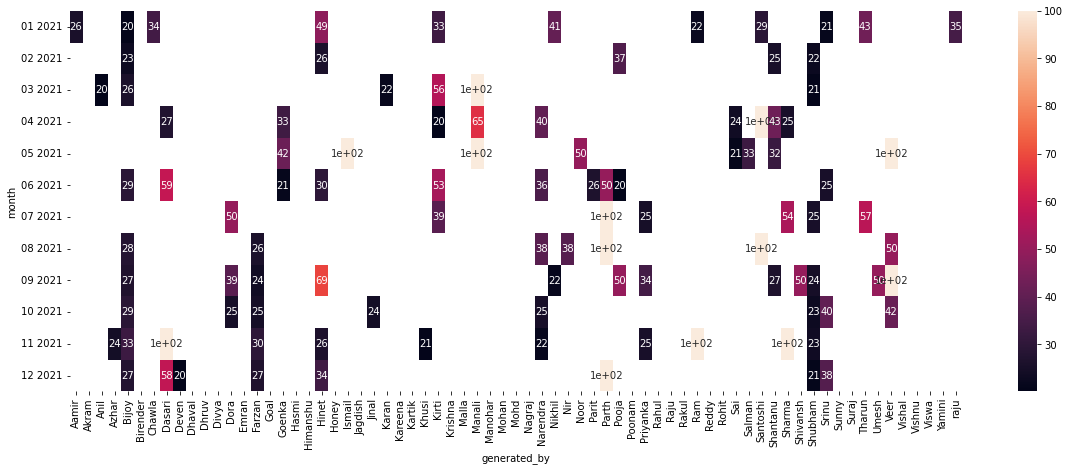

In [61]:
plt.figure(figsize=(20,7))
sns.heatmap(agent_discount[agent_discount>20],annot=True)
plt.show()

#### Owner Type

In [69]:
owner= pd.pivot_table(data=df,index='month',columns='ambulance_ownership',values='discount',aggfunc='mean')
owner

ambulance_ownership      Owned    Partner
month                                    
01 2021              13.042035   6.806172
02 2021              19.103133   9.335752
03 2021              21.463758  10.258148
04 2021              20.232508   5.160962
05 2021              13.551888   5.040557
06 2021              20.513089  10.553900
07 2021              24.724254  11.717982
08 2021              25.820449  11.084368
09 2021              25.967032  13.302733
10 2021              26.479241  15.437634
11 2021              25.673879  12.786021
12 2021              23.842943  13.953818

OWNED


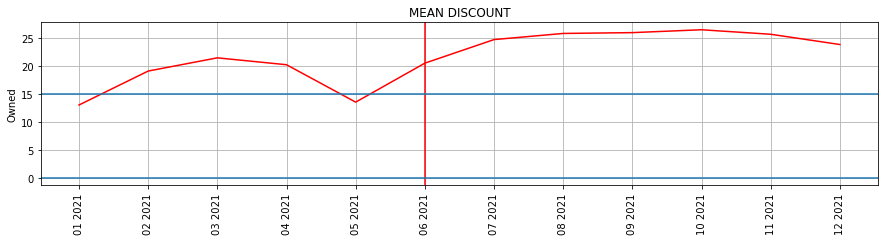



PARTNER


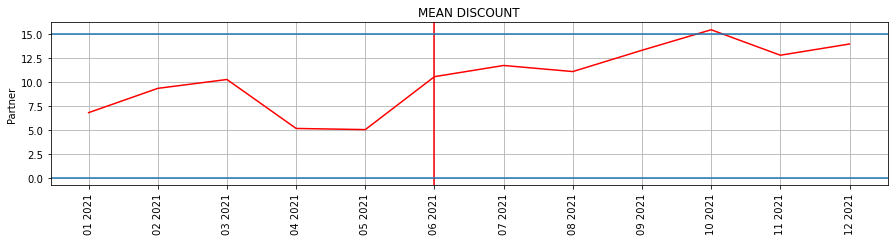

In [70]:
for i in owner.columns:
    print(i.upper())
    plt.figure(figsize=(15,3))
    plt.title('MEAN DISCOUNT')
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.plot(owner[i],color='red')
    plt.axvline(x='06 2021',color='red')
    plt.axhline(y=15)
    plt.axhline(y=0)
    plt.grid(visible=True, which='major', axis='both')
    plt.show()
    print()
    print()

In [71]:
pd.crosstab(df.generated_by,df.ambulance_ownership)

ambulance_ownership  Owned  Partner
generated_by                       
Aamir                    1        1
Akram                   10        5
Anil                     8        7
Azhar                    0        1
Bijoy                  636      259
Birender                13        3
Chawla                   8        8
Dasari                   8        7
Deven                   46       21
Dhaval                   1        1
Dhruv                    0        1
Divya                    0        1
Dora                    12        6
Farzan                 919      388
Goal                     0        1
Goenka                   1        2
Hasmi                    2        4
Himanshu                 1        0
Hinet                   27       23
Honey                    3        0
Ismail                   2        0
Jagdish                  8        2
Jinal                    3        1
Karan                    1        1
Kareena                  0        1
Kartik                   0        1
Khusi                    1        0
Kirti                   11        9
Krishna                  1        1
Malla                    0        1
Manali                   3        1
Manohar                  0        1
Mohan                    1        0
Mohd                     4        1
Nagraj                   3        2
Narendra                12       20
Nikhil                  11       11
Nir                      9        0
Noor                     1        0
Parit                    5        6
Parth                    1        0
Pooja                    3        3
Priyanka                14       14
Rahul                    1        0
Rakul                   14        7
Ram                      6        2
Reddy                    0        1
Sai                      0        3
Salman                  15        9
Santoshi                 7        4
Shantanu                18        9
Sharma                   2        6
Shubham                837      598
Srinu                  164      134
Sunny                    1        1
Suraj                    1        1
Tharun                   5        4
Umesh                    3        0
Veer                     8        8
Vishal                   2        1
Vishnu                   8        2
Viswa                    1        4
Yamini                   5        1
raju                    11       10

### Projections for 2022

In [62]:
df_22.head()

created_on    month generated_by         agent_type case_type  \
5379  01-01-2022 02:56  01 2022        Deven  Ground Operations   BOOKING   
5380  01-01-2022 04:07  01 2022        Deven  Ground Operations   BOOKING   
5381  01-01-2022 05:50  01 2022        Deven  Ground Operations   BOOKING   
5382  01-01-2022 06:17  01 2022        Deven  Ground Operations   BOOKING   
5383  01-01-2022 06:30  01 2022        Deven  Ground Operations   ENQUIRY   

     case_status trip_status ambulance_status    medical_cause emergency  \
5379   COMPLETED   COMPLETED        COMPLETED          Cardiac        No   
5380   COMPLETED   COMPLETED        COMPLETED          Cardiac       Yes   
5381   COMPLETED   COMPLETED        COMPLETED         COVID-19        No   
5382   COMPLETED   COMPLETED        COMPLETED         Dialysis        No   
5383     CREATED     CREATED              NaN  Dead body cargo        No   

     bill_to_hospital ambulance_type_requested ambulance_type_sent  \
5379               No                     EECO             ECO-MUV   
5380               No                      ALS             TMP-ALS   
5381               No                    Tempo             TMP-ALS   
5382               No                     Omni             WGR-ALS   
5383               No                     Omni                   -   

      pickup_latitude  pickup_longitude  drop_latitude  drop_longitude  \
5379        17.437450         78.482290      17.421208       78.449995   
5380        17.402346         78.566958      17.437080       78.483015   
5381        17.437450         78.482290      15.475671       77.388425   
5382        17.462872         78.560853      17.437450       78.482290   
5383        17.437450         78.482290      28.686274       77.221783   

      estimated_distance_to_pickup_kms  estimated_time_to_pickup_mins  \
5379                               8.0                           19.0   
5380                              11.0                           30.0   
5381                               0.0                            1.0   
5382                              11.0                           30.0   
5383                               NaN                            NaN   

      trip_distance_kms  system_fare  fare_proposed  trip_fare_agreed  \
5379              6.756       1538.0           2000              1500   
5380             13.283       5810.0           7000              6000   
5381            299.518      32252.0          36000             34000   
5382             11.971       1250.0              0                 0   
5383           1548.481      48402.0          55000              4800   

      fare_sys_vs_prop  fare_prop_vs_agreed  fare_sys_vs_agreed      change  \
5379            -462.0                  500                38.0    2.470741   
5380           -1190.0                 1000              -190.0   -3.270224   
5381           -3748.0                 2000             -1748.0   -5.419819   
5382            1250.0                    0              1250.0  100.000000   
5383           -6598.0                50200             43602.0   90.083054   

        discount  cost_to_owner  hospital_margin ambulance_id  \
5379    2.470741            0.0           1500.0  HYDO001A001   
5380    0.000000            0.0           6000.0  HYDO001A048   
5381    0.000000        23800.0          10200.0  HYDC193A001   
5382  100.000000            0.0              0.0  HYDF001A019   
5383   90.083054            NaN              NaN          NaN   

     ambulance_company_id ambulance_ownership  cancellation_amount_hospital  \
5379              HYDO001               Owned                           0.0   
5380              HYDO001               Owned                           0.0   
5381              HYDC193             Partner                           0.0   
5382              HYDF001               Owned                           0.0   
5383                  NaN                 NaN                           NaN   

      c

In [63]:
df_22['max_discount']=df_22.change.map(lambda x: 15 if x>15 else x)

In [65]:
df_22.shape

(442, 38)

In [66]:
df_22['trip_fare_agreed_proposed']=df_22.system_fare-(df_22.system_fare*(df_22['max_discount']/100))

In [67]:
monthly_22=df_22.groupby('month').mean()
monthly_22

pickup_latitude  pickup_longitude  drop_latitude  drop_longitude  \
month                                                                       
01 2022        17.519022         78.492551      17.510586       78.593679   
02 2022        17.455028         78.487896      17.428703       78.487034   
03 2022        17.433617         78.477620      17.439199       78.474990   
04 2022        17.429685         78.490841      17.440079       78.490824   
05 2022        17.435247         78.474017      17.269450       78.516910   
06 2022        17.443290         78.493783      17.346685       78.329518   
07 2022        17.450104         78.471538      16.672422       78.869600   
08 2022        17.437051         78.483957      17.391575       78.781594   
09 2022        17.423835         78.476184      17.417808       78.484446   
10 2022        17.435887         78.487396      17.741184       78.820140   
11 2022        17.449944         78.469577      17.421402       78.657129   
12 2022        17.419663         78.501290      17.783311       79.052786   

         estimated_distance_to_pickup_kms  estimated_time_to_pickup_mins  \
month                                                                      
01 2022                         28.512931                      39.025862   
02 2022                          6.900000                      18.000000   
03 2022                         52.333333                      57.333333   
04 2022                          2.750000                       8.000000   
05 2022                          4.071429                      13.142857   
06 2022                          5.083333                      13.500000   
07 2022                          3.857143                      11.285714   
08 2022                         30.736842                      43.789474   
09 2022                          4.250000                      11.750000   
10 2022                          3.400000                      10.600000   
11 2022                          4.875000                      13.250000   
12 2022                          0.833333                       3.500000   

         trip_distance_kms  system_fare  fare_proposed  trip_fare_agreed  \
month                                                                      
01 2022          76.616677  5901.439344    5746.504918       4199.531148   
02 2022          12.062167  2718.333333    2883.333333       2316.666667   
03 2022           9.913917  2404.666667    2522.333333       2258.333333   
04 2022          10.991200  4030.300000    7510.000000       6650.000000   
05 2022          87.327529  8029.117647    8741.176471       5841.176471   
06 2022          56.187154  5623.846154    4830.769231       3753.846154   
07 2022         142.908222  9705.555556    9800.000000       9388.888889   
08 2022          64.600840  4073.960000    3824.320000       3812.000000   
09 2022           6.587800  2409.000000    2700.000000       2100.000000   
10 2022          93.467059  6480.058824    7182.352941       5605.882353   
11 2022          31.627600  2676.200000    2640.000000       1640.100000   
12 2022         102.632286  7952.142857    7871.428571       7300.000000   

         fare_sys_vs_prop  fare_prop_vs_agreed  fare_sys_vs_agreed  \
month                                                                
01 2022        154.934426          1546.973770         1701.908197   
02 2022       -165.000000           566.666667          401.666667   
03 2022       -117.666667           264.000000          146.333333   
04 2022      -3479.700000           860.000000        -2619.700000   
05 2022       -712.058824          2900.000000         2187.941176   
06 2022        793.076923          1076.923077         1870.000000   
07 2022        -94.444444           411.111111          316.666667   
08 2022        249.640000            12.320000          261.960000   
09 2022       -291.000000           600.000000          309.000000   
10 2022       -702.294118     

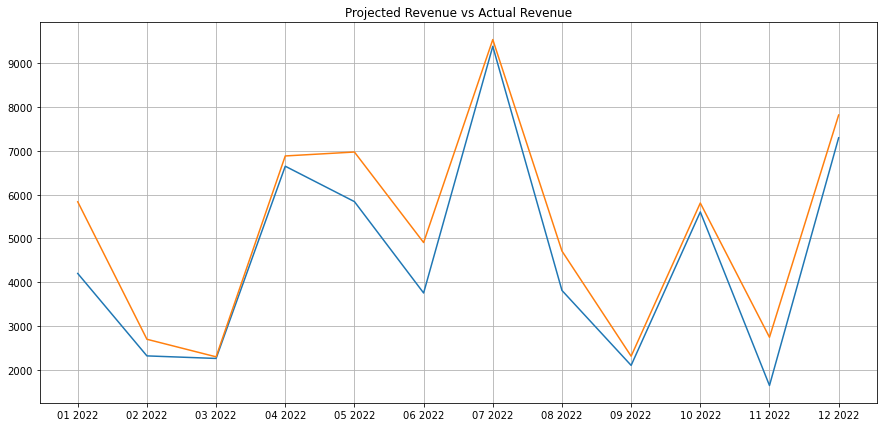

In [68]:
plt.figure(figsize=(15,7))
plt.title('Projected Revenue vs Actual Revenue')
plt.plot(monthly_22.trip_fare_agreed)
plt.plot(monthly_22.trip_fare_agreed_proposed)
plt.grid(visible=True, which='major', axis='both')
plt.show()